Name: Ly Thanh Vy Thai
s5318512
lythanhvy.thai@griffithuni.edu.au

Name: Anh Quoc NGO
s5332481
anhquoc.ngo@griffithuni.edu.au


In [1]:
import string
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML


import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import cm
import seaborn as sns
from collections import Counter

# Increase the width of the notebook for displaying DataFrames
display(HTML("<style>.container { width:75% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

/var/folders/c1/w36hc50n787c55nd5358s54h0000gn/T/ipykernel_98210/1249458443.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Part 1 – Data Preparation and Preprocessing

# 1.1 Describe the dataset

### Load the dataset using pd.read_csv (1 mark)

In [2]:
df = pd.read_csv("data.csv",low_memory=False)

### Visualize the head of dataset to describe its properties (1 mark)

In [3]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


### Describe the dataset (e.g.: type of column, value range)

In [4]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [5]:
df.dtypes

Id                   object
Title                object
Company              object
Date                 object
Location             object
Area                 object
Classification       object
SubClassification    object
Requirement          object
FullDescription      object
LowestSalary          int64
HighestSalary         int64
JobType              object
dtype: object

In [6]:
df.describe()

,LowestSalary,HighestSalary
count,318477.000000,318477.000000
mean,65.813544,114.432342
std,51.063125,177.594941
min,0.000000,30.000000
25%,30.000000,40.000000
50%,60.000000,70.000000
75%,100.000000,120.000000
max,200.000000,999.000000


### How many records are there in the dataset?

In [7]:
df.shape

(318477, 13)

### Which period does it cover? How many different dates have job postings?

In [8]:
df.columns

Index(['Id', 'Title', 'Company', 'Date', 'Location', 'Area', 'Classification',
       'SubClassification', 'Requirement', 'FullDescription', 'LowestSalary',
       'HighestSalary', 'JobType'],
      dtype='object')

In [9]:
df['Date'] = df['Date'].replace(to_replace='T00:00:00.000Z',value=' 00:00:00',regex=True)
df["Date"] = pd.to_datetime(df["Date"])

In [10]:
df.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
dtype: object

In [11]:
max_date=df['Date'].max()
min_date=df['Date'].min()
period = (max_date - min_date).days

In [12]:
print("Max date: ", max_date, ", min date: ", min_date)
print("Period :", period)

Max date:  2019-03-13 00:00:00 , min date:  2018-10-01 00:00:00
Period : 163


In [13]:
date_posting_job= df['Date'].value_counts()
df['Date'].nunique()

print("The number of dates job posting is :",df['Date'].nunique())

The number of dates job posting is : 163


### How many locations does the dataset have? Which location has the most job postings?

In [14]:
df['Location'].nunique()
print('Locations in dataset :', df['Location'].nunique())

Locations in dataset : 65


In [15]:
location_posting_jobs = df['Location'].value_counts()
print('Location has the most job postings : ',location_posting_jobs.index[0])

Location has the most job postings :  Sydney


### How many job sectors(job classifications) are there in the dataset? List the name of each sector and its’ total of job postings

In [16]:
df['Classification'].unique()

array(['Retail & Consumer Products', 'Call Centre & Customer Service',
       'Hospitality & Tourism', 'Banking & Financial Services',
       'Manufacturing, Transport & Logistics', 'Sales',
       'Administration & Office Support', 'Trades & Services',
       'Accounting', 'Real Estate & Property', 'Healthcare & Medical',
       'Marketing & Communications', 'Government & Defence',
       'Information & Communication Technology', 'Education & Training',
       'Community Services & Development', 'Mining, Resources & Energy',
       'Human Resources & Recruitment', 'Insurance & Superannuation',
       'Engineering', 'CEO & General Management', 'Design & Architecture',
       'Legal', 'Construction', 'Sport & Recreation',
       'Science & Technology', 'Advertising, Arts & Media',
       'Farming, Animals & Conservation', 'Self Employment',
       'Consulting & Strategy', nan], dtype=object)

In [17]:
job_classification_count = df['Classification'].nunique()
print('The number of job sectors in the dataset : ',job_classification_count)

The number of job sectors in the dataset :  30


In [18]:
df['SubClassification'].value_counts()

SubClassification
Other                         11349
Management                     6236
Chefs/Cooks                    4600
Administrative Assistants      4572
Developers/Programmers         4211
                              ...  
Illustration & Animation         14
Computer Operators               13
Air Force                        12
Chiropractic & Osteopathic       11
Army                              5
Name: count, Length: 338, dtype: int64

### Choose your favorite job sector (e.g. Information & Communication Technology), how many sub-sectors are there in that sector? List the name of each sub-sector and its’ job posting number.

In [19]:
df2 = df[df['Classification']=='Information & Communication Technology']

In [20]:
sub_sectors_count = df2['SubClassification'].nunique()
print("The number of the sub_sectors in ICT sector :", sub_sectors_count)

The number of the sub_sectors in ICT sector : 22


In [21]:
df2['SubClassification'].value_counts()

SubClassification
Developers/Programmers                   4211
Business/Systems Analysts                2986
Programme & Project Management           2413
Architects                               1548
Engineering - Software                   1437
Help Desk & IT Support                   1374
Networks & Systems Administration        1194
Consultants                              1149
Other                                     997
Testing & Quality Assurance               831
Security                                  774
Management                                746
Engineering - Network                     552
Database Development & Administration     551
Web Development & Production              452
Sales - Pre & Post                        449
Product Management & Development          376
Telecommunications                        357
Team Leaders                              173
Engineering - Hardware                    116
Technical Writing                          97
Computer Operato

### List the salary ranges and their total of job postings

In [22]:
low = df['LowestSalary'].dropna().unique()
high = df['HighestSalary'].dropna().unique()

In [23]:
df_salary_ranges = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges['Count'] = df_salary_ranges['Low'].apply(lambda x: len(df[df['LowestSalary']==x]))

In [24]:
df_salary_ranges

,Low,High,Count
0,0,30,62639
1,30,40,23476
2,40,50,34436
3,50,60,27027
4,60,70,28499
5,70,80,28712
6,80,100,24249
7,100,120,27673
8,120,150,24514
9,150,200,25841


### List the job types. In each job type, what are the lowest salary and highest salary?

In [25]:
df['JobType'].value_counts()

JobType
Full Time          201225
Contract/Temp       53906
Casual/Vacation     25355
Part Time           21893
Name: count, dtype: int64

In [26]:
new_df=df.fillna(value='FILL VALUE',axis=1)

In [27]:
df_jobtype = new_df[new_df['JobType']!='FILL VALUE'][['JobType','LowestSalary','HighestSalary']]
df_jobtype

,JobType,LowestSalary,HighestSalary
121,Full Time,0,30
122,Full Time,0,30
123,Full Time,0,30
124,Full Time,0,30
125,Contract/Temp,0,30
...,...,...,...
318335,Full Time,150,200
318336,Full Time,150,200
318337,Full Time,150,200
318338,Full Time,150,200


In [28]:
min_salary = df_jobtype.groupby('JobType').agg({'LowestSalary':['min']})
min_salary

,LowestSalary
,min
JobType,
Casual/Vacation,0
Contract/Temp,0
Full Time,0
Part Time,0


In [29]:
max_salary = df_jobtype.groupby('JobType').agg({'HighestSalary':['max']})
max_salary

,HighestSalary
,max
JobType,
Casual/Vacation,999
Contract/Temp,999
Full Time,999
Part Time,999


# 1.2.Normalize and clean the data.

### Calculate the avarage salary using df.assign

In [30]:
df = df.assign(AverageSalary = (df['LowestSalary']+ df['HighestSalary'])/2)
df.head(5)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0


### Clean Id column using regex

In [31]:
df["Id"] = df["Id"].replace(to_replace=r'&.*', value='', regex=True)

### Clearn date column using regex

In [32]:
df["Date"] = df["Date"].replace(to_replace=r'T.*', value='', regex=True)
df.dtypes

Id                           object
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

### Change type of related columns

In [33]:
# Set column "Id" to type int64
df["Id"] = df["Id"].astype('int64')

# Set column "Date" to type datetime64[ns]
df["Date"] = pd.to_datetime(df["Date"])

# Data types after data cleaning and conversions
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                  int64
HighestSalary                 int64
JobType                      object
AverageSalary               float64
dtype: object

In [34]:
#Save the cleaned and preprocessed dataset
df.to_csv("preprocessed_data.csv")

### Are there any duplicate data in the dataset? Provide the way you find them and your solution to fix it

In [35]:
duplicate_count = df[df.duplicated()].shape[0]
print("Duplicates found: ", duplicate_count)

no_dates = df.drop('Date', axis=1)
duplicate_count_no_dates = no_dates[no_dates.duplicated()].shape[0]

difference = duplicate_count_no_dates - duplicate_count
print('Additional duplicates found without regard to timestamp: ', difference)

Duplicates found:  108
Additional duplicates found without regard to timestamp:  43


### Check missing data and visualize them in a corresponding chart

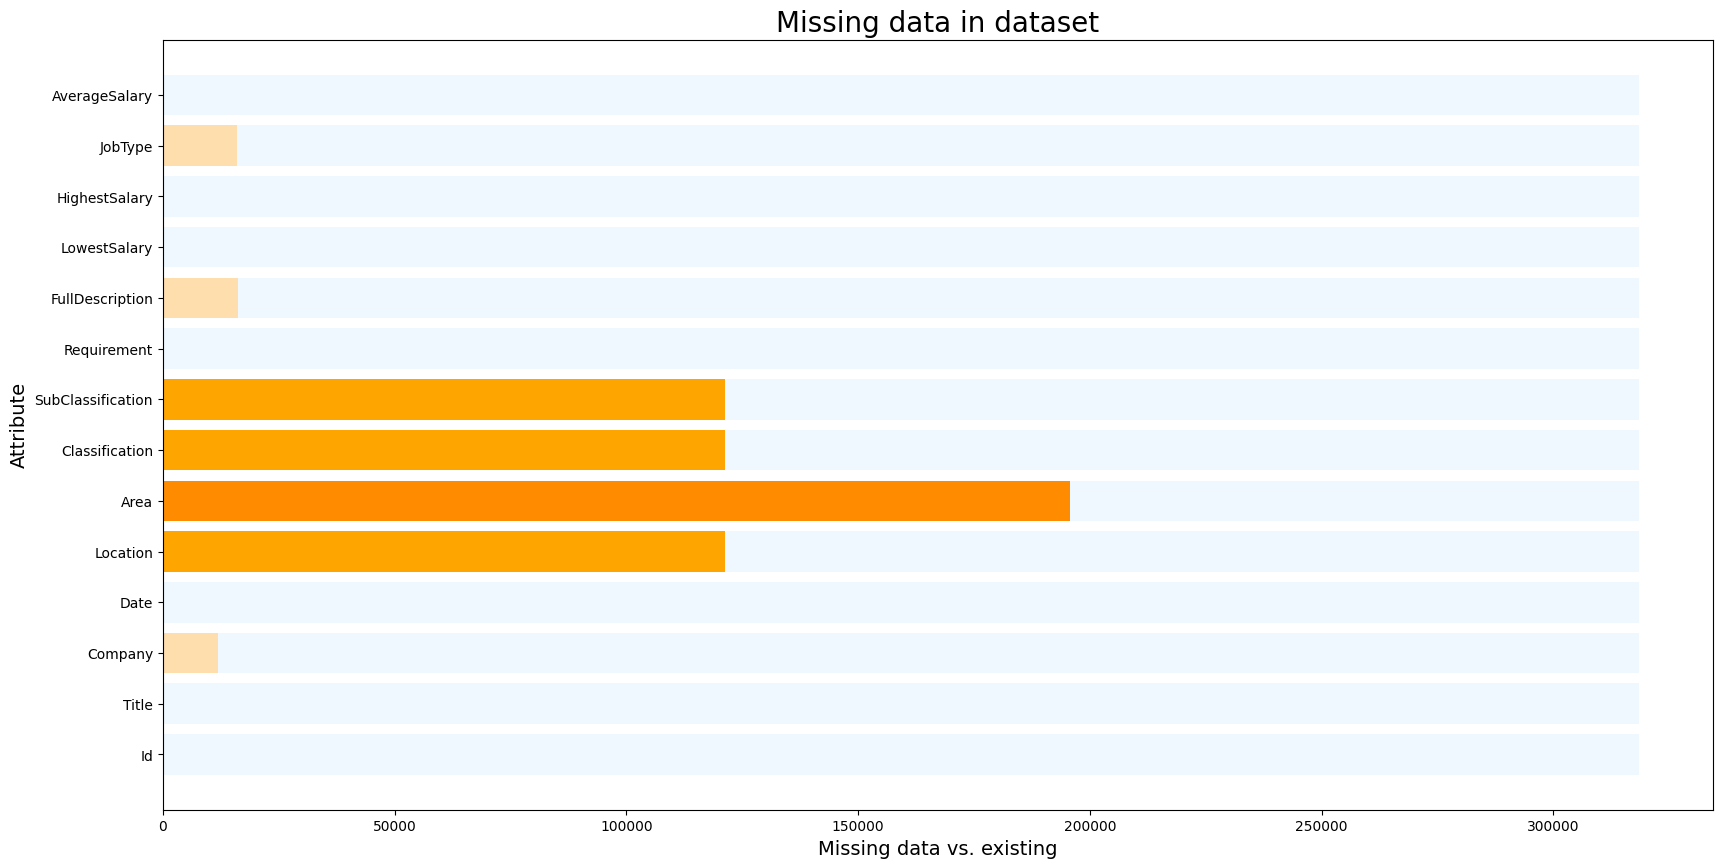

In [36]:
#Check missing data and visualize them in a corresponding chart

def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show()

In [37]:
tot = df.shape[0]

print('Attributes with missing data: ')
for i in range(len(nulls)):
    if(nulls[i] > 0):
        print('    {0}: {1:.2f}%'.format(df.columns.values[i], (nulls[i] / tot) * 100))

Attributes with missing data: 
    Company: 3.77%
    Location: 38.07%
    Area: 61.49%
    Classification: 38.07%
    SubClassification: 38.07%
    Requirement: 0.00%
    FullDescription: 5.08%
    JobType: 5.05%


In [38]:
#Inspect further missing data of Area column

df_area = df[(df['Area'].isna()==False) & (df['Location'].isna()==False)]
print(df_area['Location'].unique())

['Sydney' 'Brisbane' 'Melbourne' 'Perth']


In [39]:
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN,599.5
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN,599.5
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN,599.5
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN,599.5


In [40]:
# Investigate missing data in Classification, SubClassification and Location column
 
df_missing_data = df[(df['Classification'].isna()==True)&
                     (df['SubClassification'].isna()==True)&
                     (df['Location'].isna()==True)]
missing_data_dates = df_missing_data.sort_values('Date')['Date'].dropna().unique()
missing_data_start = missing_data_dates[0]
print(missing_data_start)
missing_data_end = missing_data_dates[len(missing_data_dates)-1]
print(missing_data_end)
 
# Any missing data before 16-12-2018?
 
df_reduced = df[df['Date'] < missing_data_start]
print(df_reduced)
# print(df_reduced[['Location', 'Classification', 'SubClassification']].isnull().sum())

2018-12-16 00:00:00
2019-03-13 00:00:00
              Id                                              Title  \
0       37404348                           Casual Stock Replenisher   
1       37404337                           Casual Stock Replenisher   
2       37404356  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3       37404330                              Team member - Belrose   
4       37404308  Business Banking Contact Centre Specialist, Ni...   
...          ...                                                ...   
197224  37828217           Environmental Officer- Contaminated Land   
197225  37828093  Construction Manager Required - Commercial & A...   
197226  37828001                                        ENT Surgeon   
197227  37827910                                Orthopaedic Surgeon   
197228  37827864                                    VMWare Engineer   

                                               Company       Date  \
0                                     

# SUMMARY OF DATA PROCESSING AND CLEANING

The dataset in .csv format has been loaded into a Data Frame using the read_csv() function of the Pandas Library. The following  preprocessing/data cleaning steps have been performed as below:

1/ Maintain consistent representation of dataset values

- The raw dataset values of the "Id" column had inconsistencies in their representation. Therefore, unnecessary characters have been removed so that the Id values have 8 number long integers only. 
- The "Date" column is represented in a format that contained both date and time information. However, the time is not correct and is being removed. 

2/ Data Types

- The date column has data type as "object" and has therefore been converted to its appropriate "datetime" data type, so that it can be used for data manipulation.
- The type of “Id” column is convered to numeric ("int64" type).
- All other attributes have been checked and correctly been assigned the "object" data type.

3/ Duplicate Data

- There are 108 exact duplicates found within the dataset, these will be removed as identical job postings posted at the same time and is considered dirty data.
- An additional 43  duplicates found without regard to timestamp, which means that duplicate postings were posted at a different date, but with all other attributes being identical. This requires further investigation as there are 2 possible scenarios as:
    - A job position was not filled yet and therefore the job was reposted at another time.
    - For the same job position, the company may have additional capacity 
    
Both scenarios still yields meaningful data to this analysis. For that reason, those duplicates have not yet been removed from the Data Frame.

4/ Missing Data

The chart above shows the number of missing data for each attribute, relative to the total amount of data

- Area is the most notable attribute, in which jobs are being missing (61.49% of the data). The reason is that only 4 out of 65 locations have specified an Area as part of a job post, which are Sydney, Melbourne, Brisbane and Perth. 
- Classification, SubClassification and Location attributes are with a consistent 38.07% missing data. With further investigation, the missing values for those attributes are between 16-12-2018 and 13-03-2019. This also means that when analysing the dataset by Location, Classification & Subclassification, the data actually only covers a date range from the 1-10-2018 to 16-12-2018.

# Part 2 – Data Understanding

### Bar chart to display the correlations between “AverageSalary” and the total jobs of each range. 

In [41]:
colors = ['#1F77B4', '#AEC7E8', '#FF7F0E', '#FFBB78', '#2CA02C', '#98DF8A', '#B5CF6B', '#FF9896','#9467BD', '#C5B0D5', '#BCBD22']

In [42]:
#Group by average salary and count the numbers
averageSalaryDf = df.groupby('AverageSalary').count()
averageSalaryDf['AverageSalary'] = (averageSalaryDf.index*1000).astype(float).map('{:,.0f}'.format)
averageSalaryDf['Count'] = averageSalaryDf["Id"]
averageSalaryDf

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Count
AverageSalary,,,,,,,,,,,,,,,
15.0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,62639,56080,"15,000",62639
35.0,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,23476,22094,"35,000",23476
45.0,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,34436,33585,"45,000",34436
55.0,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,27027,26222,"55,000",27027
65.0,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,28499,27566,"65,000",28499
75.0,28712,28712,27794,28712,17053,10456,17053,17053,28712,27670,28712,28712,27674,"75,000",28712
90.0,24249,24249,23625,24249,12701,7562,12701,12701,24248,23587,24249,24249,23590,"90,000",24249
110.0,27673,27673,27150,27673,17137,10575,17137,17137,27671,26682,27673,27673,26683,"110,000",27673
135.0,24514,24514,24165,24514,14701,9481,14701,14701,24514,23610,24514,24514,23612,"135,000",24514


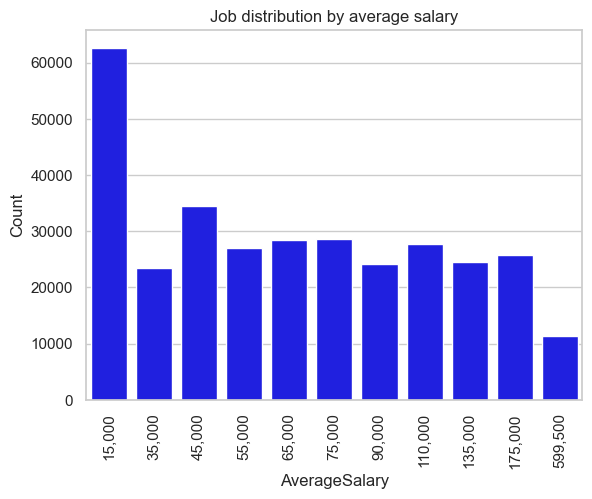

In [43]:
sns.set()
sns.set_style("whitegrid")
 
sns.barplot(data=averageSalaryDf, x="AverageSalary", y="Count", color = "blue")
plt.title("Job distribution by average salary")
plt.xticks(rotation = 90)
plt.show()

Assuming to use AUD as currency of salary

- The Average Salary varies through job listings. 
- Jobs with AUD15,000 Average Salary contribute the most in the distribution, with more than 60,000 jobs.
- AUD45,000-salary ranks the 2nd with around 25,000 jobs.
- The lowest rank belongs to AUD599,500-salary with around 11,000 jobs. 

### Pie chart to display the relationship between job types and the number of jobs.

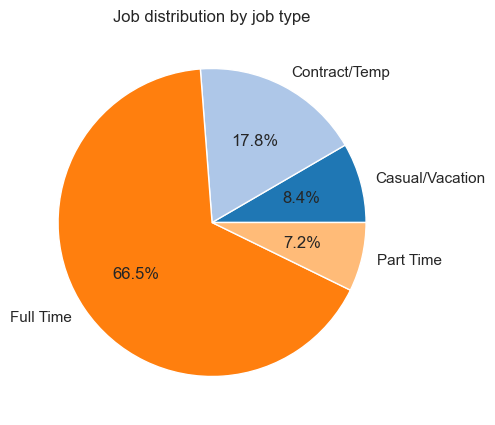

In [44]:
jobTypeDf = df.groupby('JobType').count()
jobTypeDf['Count'] = jobTypeDf["Id"]
jobTypeDf['JobType'] = jobTypeDf.index

plt.figure(figsize = (5,5))
plt.pie(jobTypeDf['Count'], labels=jobTypeDf['JobType'], colors=colors, autopct='%.1f%%')
plt.title("Job distribution by job type")
plt.show()

- The most significant job type is Full-time job, which accounted for over half of the job distribution (as 66.5%)
- Contract/Temporary jobs is at the second position, which accounted for 17.8%.
- Casual/Vacation and Part-time jobs accounted the least in the job distribution, which are 8.4% and 7.2% respectively. 

### Display the list of job sectors and the number of jobs of each type using horizontal bar chart.

In [45]:
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.sort_values("Count", ascending=False, inplace=True)


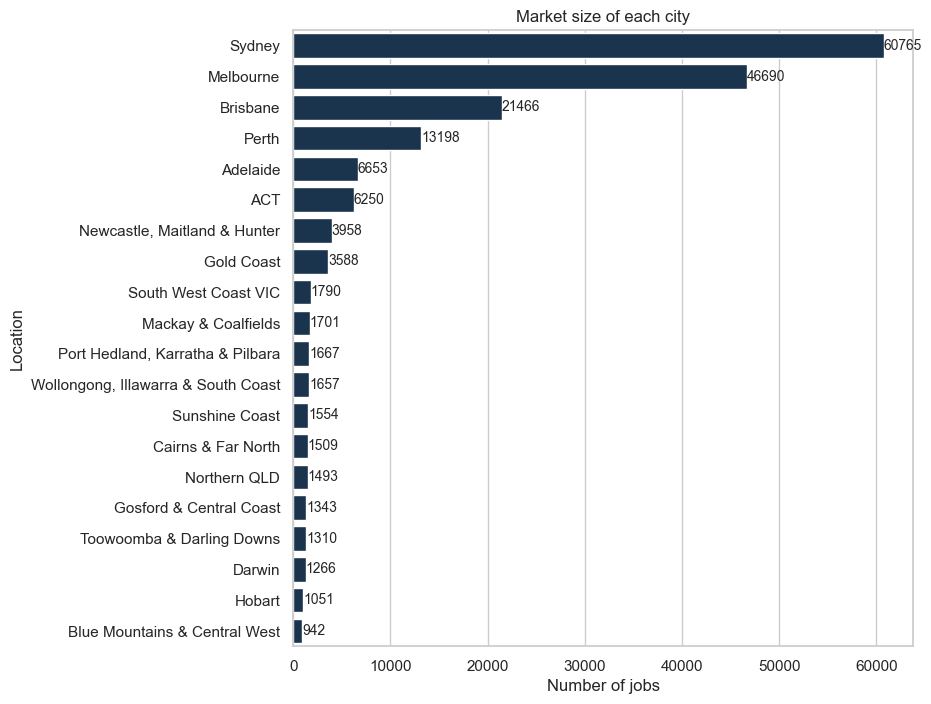

In [46]:
plt.figure(figsize=(8,8))
ax=sns.barplot(data=locationDf,
           x="Count",
           y="Location",
           color="#123456",
           order=locationDf['Location'][:20])
ax.bar_label(ax.containers[0], fontsize=10)
ax.set(xlabel='Number of jobs', ylabel='Location')
plt.title("Market size of each city")
plt.show()

### Choose your favorite location. Visualize the market share of that location in pie chart.

In [47]:
# Group what are small slices into "Others" group

def group_others(thr, df):
   
    #calculate percentages
    total = df['Count'].sum()
    df['Percent'] = df['Count'].apply(lambda x: x*100/total)
    df = df.sort_values(by=['Count'], ascending=False, ignore_index=True)
    
    above_threshold = df.loc[df['Percent'] > thr]
    others = df.loc[df['Percent'] < thr].sum()
     # check if anything has been grouped as others
    if others['Count'] > 0:
        
        # check if a SubClass called 'Other' already exists
        # and if yes, append it to the new 'Others' column
        if 'SubClassification' in df and 'Other' in df['SubClassification'].tolist():

                # append the two 'Others' columns together and drop the old one
                others['Count'] = others['Count'] + df[df['SubClassification']=='Other']['Count']
                others['Percent'] = others['Percent'] + df[df['SubClassification']=='Other']['Percent']
                index = df.index[df["SubClassification"]=='Other'].tolist()[0]
                above_threshold = above_threshold.drop([index])
               
        others['Classification'] = 'Others'
        others['SubClassification'] = 'Others'
        return above_threshold._append(others, ignore_index=True)
    else:
        
        return above_threshold

In [48]:
#Visualize the market share of a specific location 

locations = df['Location'].dropna().unique()
classifications = df['Classification'].dropna().unique()
df_class = pd.DataFrame({"Classification":classifications})

def update(Location=locations):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    
    #get total count of jobs for each classification
    df_class['Count'] = df_class['Classification'].apply(lambda x: pd.Series(len(df[(df['Location']==Location)&(df['Classification']==x)])))
    
    #group the classifications that have < 1% together into 'others' category
    others_df = group_others(1, df_class)
    

    p, texts, autotexts = ax.pie(others_df['Count'],
                                 labels=others_df['Classification'],
                                 wedgeprops={'alpha':0.8},
                                 autopct='%1.1f')
    ax.title.set_text(Location.upper())
    ax.title.set_size(20)
    
    for t in texts:
        t.set_color('black')
    for t in autotexts:
        t.set_color('black')
        t.set_size(12)
    plt.show()
    
interact(update, Location=locations)

interactive(children=(Dropdown(description='Location', options=('Sydney', 'Richmond & Hawkesbury', 'Brisbane',…

<function __main__.update(Location=array(['Sydney', 'Richmond & Hawkesbury', 'Brisbane',
       'Gosford & Central Coast', 'Adelaide', 'Melbourne', 'Perth',
       'Mackay & Coalfields', 'Sunshine Coast', 'Gold Coast',
       'West Gippsland & Latrobe Valley', 'Hervey Bay & Fraser Coast',
       'South West Coast VIC', 'Mornington Peninsula & Bass Coast',
       'Port Hedland, Karratha & Pilbara', 'Ballarat & Central Highlands',
       'Bendigo, Goldfields & Macedon Ranges',
       'Yarra Valley & High Country', 'Coffs Harbour & North Coast',
       'Newcastle, Maitland & Hunter', 'Tumut, Snowy & Monaro', 'Darwin',
       'Toowoomba & Darling Downs', 'ACT',
       'Wollongong, Illawarra & South Coast',
       'Port Macquarie & Mid North Coast',
       'Southern Highlands & Tablelands', 'Albury Area',
       'Yorke Peninsula & Clare Valley',
       'Kalgoorlie, Goldfields & Esperance',
       'Far West & North Central NSW', 'Cairns & Far North',
       'Wagga Wagga & Riverina', 'Lismore

- Brisbane is chosen for analyzing.
- Information & Communication Technology contributes the most to the market share, with 12.9%.
- It is followed by Trades & Services (9.3%), Healthcare & Medical (8.5%) and Manufacturing, Transport & Logistics (7.8%)
- The least contribution belongs to Banking & Financial services, Marketing and Communications and other classifications. (with 1.6% and below)

### Visualize the salary distribution for the top 30 cities for the number of job postings in the boxplot chart

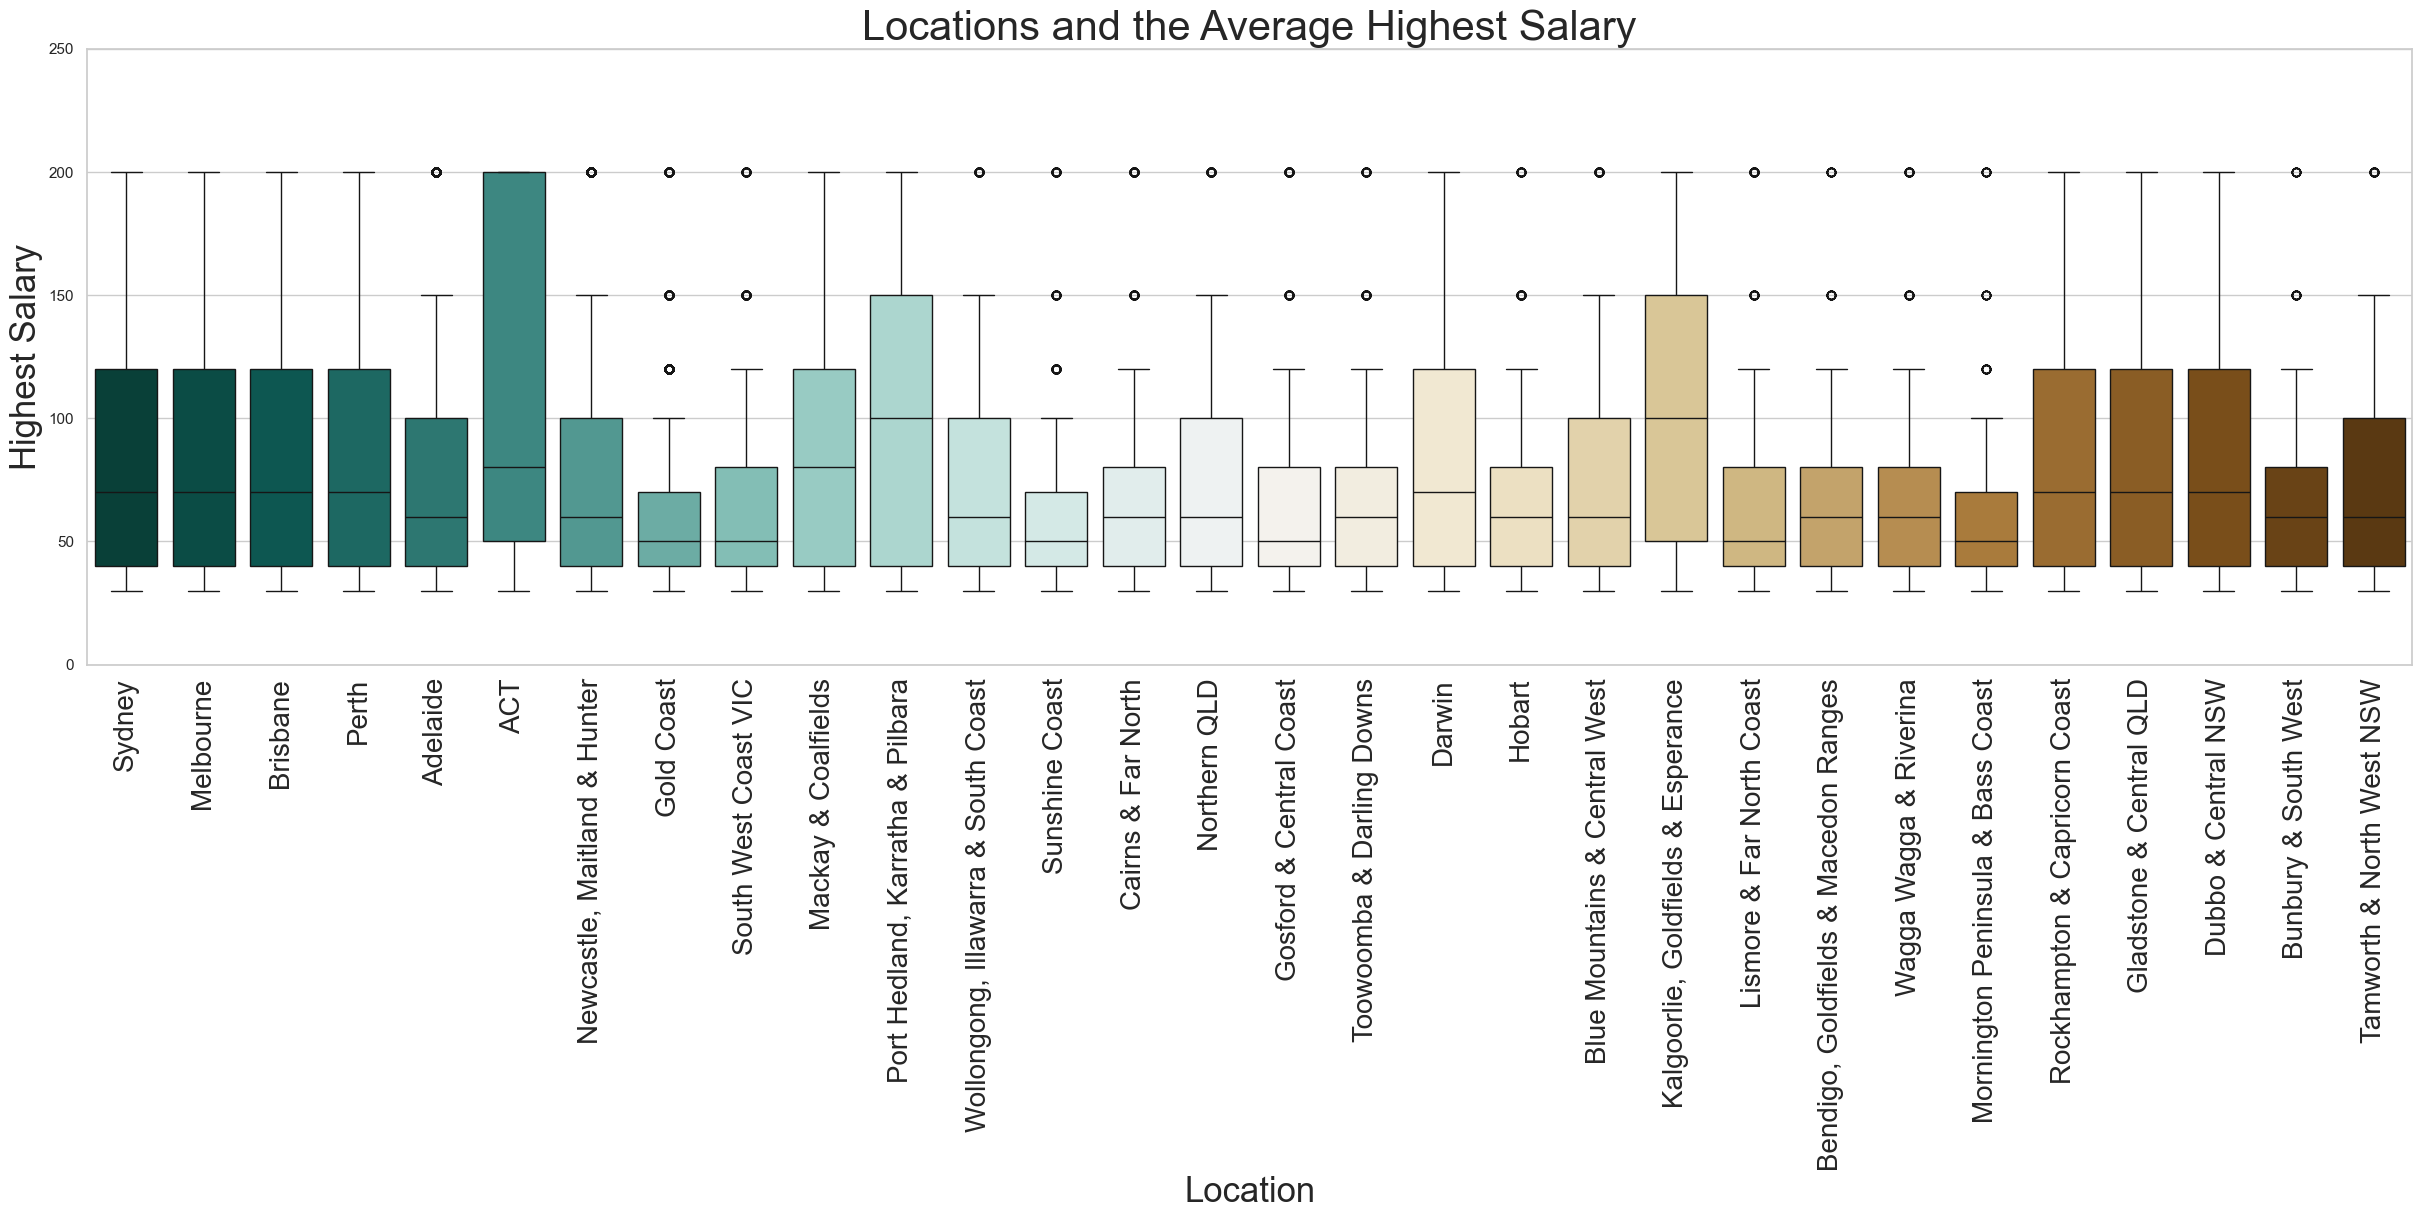

In [49]:
plt.figure(figsize=(30,8))

locationDf = df[df['Location'].isna()==False]
top30Df = locationDf.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
HighSalaryLocationDf= df[df['Location'].isin(top30Df)]

box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=HighSalaryLocationDf, order=top30Df,palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.ylabel('Highest Salary',fontsize=25)
plt.xlabel('Location',fontsize=25)

plt.ylim([0,250])
plt.show()

- The above boxplot illustrates the number of job listings and average highest salary distribution of the top 30 cities.
- Sydney, Melbourne, Brisbane and Perth are the four cities which have the highest number of job listings, but be in the 3rd position of highest  average salary. 
- ACT has the highest average salary, however has fewer job listings compared to above-mentioned cities. 

# Part 3 – Data Analysis and Visualisation

## 1. Analyse by comparison : Choose your two favourite cities/locations. We will explore the difference between them by answering the following questions

### Which city has more job? How many jobs each type (casual, fulltime, etc.) are there in each city?

In [50]:
df

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN,15.0
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN,15.0
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN,15.0
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318472,38564891,Program Manager - Trade Reporting,Talenza,2019-03-13,NaN,NaN,NaN,NaN,Our client is a large Financial Services firm ...,NaN,200,999,NaN,599.5
318473,38564940,Web Content Writer - June 2019 contract,Talent – Winner ‘Seek Large Recruitment Agency...,2019-03-13,NaN,NaN,NaN,NaN,You will be able to write clearly and concisel...,NaN,200,999,NaN,599.5
318474,38552964,Brand Director - Global Premium Brand,Retail Career Consulting Pty Ltd,2019-03-12,NaN,NaN,NaN,NaN,Newly created Brand Director AUS. Must be comm...,NaN,200,999,NaN,599.5
318475,38534438,"Head of Financial Planning, Reporting & Strategy",Moir Group,2019-03-08,NaN,NaN,NaN,NaN,High-quality manufacturing organisation. Excit...,NaN,200,999,NaN,599.5


In [51]:
cities = ['Sydney','Brisbane']
dfCity = df[df['Location'].isin(cities)]
dfCity = dfCity[dfCity['JobType']!='FILL VALUE']

In [52]:
dfCompare1 = dfCity.groupby(['Location','JobType']).count()
dfCompare1=dfCompare1.reset_index()
dfCompare1=dfCompare1[['Location', 'JobType','Id']]

In [53]:
dfCompare1.pivot(index=['Location'],columns='JobType',values='Id')

JobType,Casual/Vacation,Contract/Temp,Full Time,Part Time
Location,,,,
Brisbane,1886,4115,13004,1216
Sydney,3017,10995,40607,2851


### In each city, which are top 5 job sectors? How many jobs are there in each sector?

In [54]:
dfCompareC1 = dfCity[dfCity['Location']=='Sydney'].groupby(['Location','Classification']).count().reset_index().sort_values(['Id'], ascending=False) 
dfCompareC1['Count']=dfCompareC1['Id']
dfC1=dfCompareC1.head(5)[['Location','Classification','Count']]
dfC1

,Location,Classification,Count
17,Sydney,Information & Communication Technology,9548
15,Sydney,Hospitality & Tourism,4074
29,Sydney,Trades & Services,4026
0,Sydney,Accounting,4010
14,Sydney,Healthcare & Medical,3339


In [55]:
dfCompareC2 = dfCity[dfCity['Location']=='Brisbane'].groupby(['Location','Classification']).count().reset_index().sort_values(['Id'], ascending=False) 
dfCompareC2['Count']=dfCompareC1['Id']
dfC2=dfCompareC2.head(5)[['Location','Classification','Count']]
dfC2

,Location,Classification,Count
17,Brisbane,Information & Communication Technology,9548
29,Brisbane,Trades & Services,4026
14,Brisbane,Healthcare & Medical,3339
20,Brisbane,"Manufacturing, Transport & Logistics",3308
15,Brisbane,Hospitality & Tourism,4074


In [56]:
dfC1.reset_index(drop=True,inplace=True)
dfC2.reset_index(drop=True,inplace=True)

In [57]:
pd.merge(dfC1, dfC2, left_index=True, right_index=True)

,Location_x,Classification_x,Count_x,Location_y,Classification_y,Count_y
0,Sydney,Information & Communication Technology,9548,Brisbane,Information & Communication Technology,9548
1,Sydney,Hospitality & Tourism,4074,Brisbane,Trades & Services,4026
2,Sydney,Trades & Services,4026,Brisbane,Healthcare & Medical,3339
3,Sydney,Accounting,4010,Brisbane,"Manufacturing, Transport & Logistics",3308
4,Sydney,Healthcare & Medical,3339,Brisbane,Hospitality & Tourism,4074


### Visualise the top 5 job sectors in pie chart for each city.

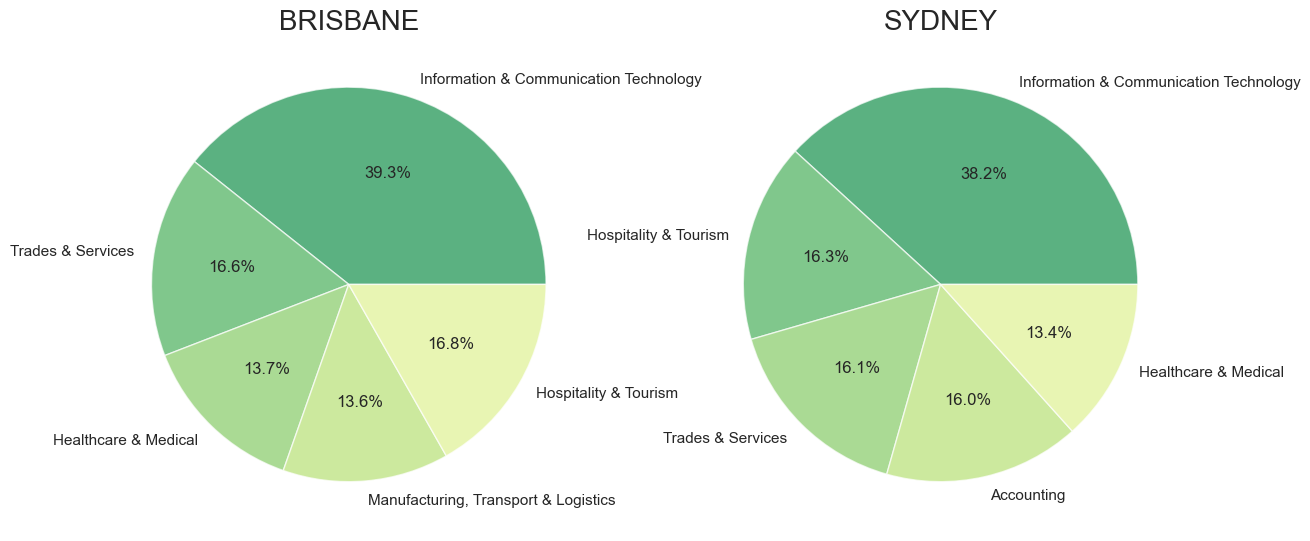

In [58]:
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(14,14))
p, texts, autotexts = ax1.pie(
    dfC1['Count'], 
    colors=sns.color_palette("RdYlGn_r", len(df_salary_ranges)),
    labels=dfC1['Classification'],
    wedgeprops={'alpha':0.7},autopct='%.1f%%')
ax1.title.set_text('SYDNEY')
ax1.title.set_size(20)

p, texts, autotexts = ax2.pie(
    dfC2['Count'], 
    colors=sns.color_palette("RdYlGn_r", 
    len(df_salary_ranges)),
    labels=dfC2['Classification'],
    wedgeprops={'alpha':0.7},autopct='%.1f%%')
ax2.title.set_text('BRISBANE')
ax2.title.set_size(20)

<h3>Observation</h3>
<li>The two pie charts above represent the proportion of top 5 job sectors in Brisbane and Sydney.</li>
<li>In Brisbane, the percentages of ICT take a larger proportion with 39.3% while 38.2% is proportion in Sydne.Regarding other sectors, Hospitality and Toursim, Trades & Service and Healthcare & Medical in Brisbane and Sydney is around 16%. One difference is that Manufacturing Transport & Logistics have in top 5 sector in Brisbane whereas Acctount sectors only have in Sydney</li>

### In each city, list the job salary range with the corresponding number of jobs. Which city is more well-paid?

In [59]:
dfCity1 = dfCity[dfCity['Location']=='Sydney']
dfCity2 = dfCity[dfCity['Location']=='Brisbane']

In [60]:
# insert something here
low = dfCity1['LowestSalary'].dropna().unique()
high = dfCity1['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

df_salary_ranges1 = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges1['Count'] = df_salary_ranges1['Low'].apply(lambda x: len(dfCity1[dfCity1['LowestSalary']==x]))
df_salary_ranges1['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', 
                                        '120-150', '150-200', '200-999'])
df_salary_ranges1['Location']='Sydney'

In [61]:
# insert something here
low = dfCity2['LowestSalary'].dropna().unique()
high = dfCity2['HighestSalary'].dropna().unique()
assert(len(low)==len(high))

df_salary_ranges2 = pd.DataFrame({"Low": low, "High":high})
df_salary_ranges2['Count'] = df_salary_ranges['Low'].apply(lambda x: len(dfCity2[dfCity2['LowestSalary']==x]))
df_salary_ranges2['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120',
                                        '120-150', '150-200', '200-999'])
df_salary_ranges2['Location']='Brisbane'

In [62]:
df_salary_ranges1

,Low,High,Count,Label,Location
0,0,30,11753,0-30,Sydney
1,30,40,3969,30-40,Sydney
2,40,50,5371,40-50,Sydney
3,50,60,4861,50-60,Sydney
4,60,70,5288,60-70,Sydney
5,70,80,5033,70-80,Sydney
6,80,100,3738,80-100,Sydney
7,100,120,5579,100-120,Sydney
8,120,150,5706,120-150,Sydney
9,150,200,6274,150-200,Sydney


In [63]:
df_salary_ranges2

,Low,High,Count,Label,Location
0,0,30,4082,0-30,Brisbane
1,30,40,1565,30-40,Brisbane
2,40,50,2734,40-50,Brisbane
3,50,60,1936,50-60,Brisbane
4,60,70,2033,60-70,Brisbane
5,70,80,1800,70-80,Brisbane
6,80,100,1327,80-100,Brisbane
7,100,120,1934,100-120,Brisbane
8,120,150,1462,120-150,Brisbane
9,150,200,1612,150-200,Brisbane


### List top 5 companies in each city? Which sectors do they belong to?

In [64]:
dfCity1 = dfCity1[dfCity1['Company'] != 'FILL VALUE']
dfCity1=dfCity1[['Location','Company','Classification']]
df_top_companies1 = dfCity1[['Location','Company']]
df_top_companies1=df_top_companies1.groupby(['Company']).count().reset_index().sort_values(['Location'], ascending=False) 

dfCity2 = dfCity2[dfCity2['Company'] != 'FILL VALUE']
dfCity2=dfCity2[['Location','Company','Classification']]
df_top_companies2 = dfCity2[['Location','Company']]
df_top_companies2=df_top_companies2.groupby(['Company']).count().reset_index().sort_values(['Location'], ascending=False) 


In [65]:
df_top_companies1.head(5)

,Company,Location
4342,Jora Local,1920
6800,Robert Walters,607
2435,Design & Build,596
6055,Paxus,375
1312,Bluefin Resources Pty Limited,356


In [66]:
df_top_companies2.head(5)

,Company,Location
2471,Jora Local,314
2243,Hudson,267
5087,u&u. Recruitment Partners,265
4564,The University of Queensland,248
3535,Programmed Skilled Workforce,210


In [67]:
df_city_sector_1 = dfCity1[['Company', 'Classification']].drop_duplicates()
df_city_sector_2 = dfCity2[['Company', 'Classification']].drop_duplicates()

In [68]:
df_top_sector_1 = pd.merge(df_top_companies1.head(5),df_city_sector_1,on='Company',how='inner')[['Company','Classification']]
df_top_sector_1['Location']='Sydney'
df_top_sector_2 = pd.merge(df_top_companies2.head(5),df_city_sector_2,on='Company',how='inner')[['Company','Classification']]
df_top_sector_2['Location']='Brisbane'

In [69]:
df_top_sector_1

,Company,Classification,Location
0,Jora Local,Hospitality & Tourism,Sydney
1,Jora Local,Trades & Services,Sydney
2,Jora Local,Retail & Consumer Products,Sydney
3,Robert Walters,Information & Communication Technology,Sydney
4,Robert Walters,Accounting,Sydney
5,Robert Walters,Banking & Financial Services,Sydney
6,Robert Walters,Call Centre & Customer Service,Sydney
7,Robert Walters,Administration & Office Support,Sydney
8,Robert Walters,Legal,Sydney
9,Robert Walters,Sales,Sydney


In [70]:
df_top_sector_2

,Company,Classification,Location
0,Jora Local,Hospitality & Tourism,Brisbane
1,Jora Local,Retail & Consumer Products,Brisbane
2,Jora Local,Trades & Services,Brisbane
3,Hudson,Information & Communication Technology,Brisbane
4,Hudson,Administration & Office Support,Brisbane
...,...,...,...
62,Programmed Skilled Workforce,Human Resources & Recruitment,Brisbane
63,Programmed Skilled Workforce,Sport & Recreation,Brisbane
64,Programmed Skilled Workforce,"Mining, Resources & Energy",Brisbane
65,Programmed Skilled Workforce,Engineering,Brisbane


### Between 2 cities, which do you think it is better for employees. Explain your choice

<h>There are two reasons to explain why employees should choose Sydney than Brisbane to look for a job.</h>
Firstly,The number job postings in Sydney is higher than in Brisbane. For instance , fulltime jobs in Sydney account for nearly 4 times than Brisbane. Moreover, job types such as Causual, Contract or Partime in Sydney also is higher.
In Sydney, employees have easily get an opportunity to receive well-paid salary than Brisbane. One of example is that the amount of jobs with range salary from AUD100000 to AUD200000 per year in Sydney are significantly higher than Brisbane. It is approximately 5 to 6 times higher.


## 2. Analyse by time : In this part, we will analyse the jobs based on the posting date.

### Visualise the number of job posts by month

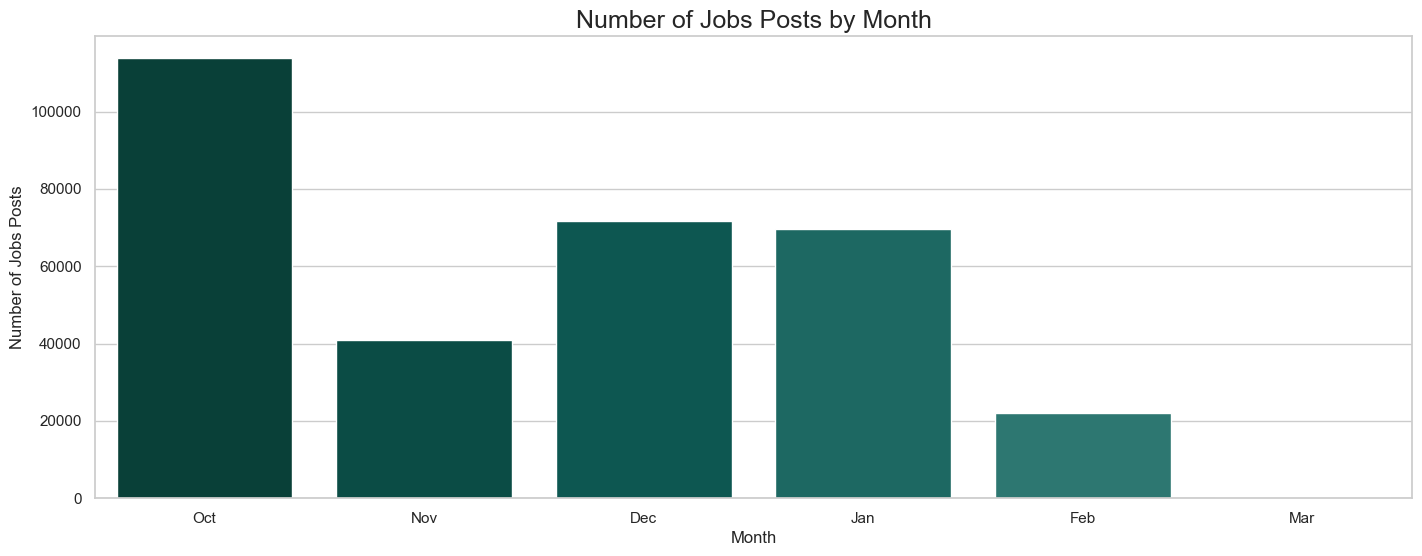

In [71]:
df['Month']=df['Date'].dt.strftime("%b")
df_jobs_bymonth = df.groupby(['Month']).count().reset_index().sort_values(['Month'], ascending=True) 
df_jobs_bymonth['Count']= df_jobs_bymonth['Id']


month_cats = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

df_jobs_bymonth['Month'] = pd.Categorical(df_jobs_bymonth['Month'], 
                                                categories=month_cats, ordered=True)
df_jobs_bymonth = df_jobs_bymonth.sort_values('Month')

plt.figure(figsize=(17,6))
plt.title('Number of Jobs Posts by Month',size=18)
bar_plt = sns.barplot(x='Month', 
                      y='Count', 
                      palette= sns.color_palette("BrBG_r", 30), 
                      data=df_jobs_bymonth, dodge=False)
bar_plt.set_xlabel('Month')
bar_plt.set_ylabel('Number of Jobs Posts')
plt.show()


<h3>Observation</h3>
<li>The bar chart above shows the number of jobs post by each month from October 2018 to March 2019. The job posted in October 2018 is highest in data and used in data analysis. In March 2019, it is no meaningful data  </li>

### Visualise the number of job posts by day of week.

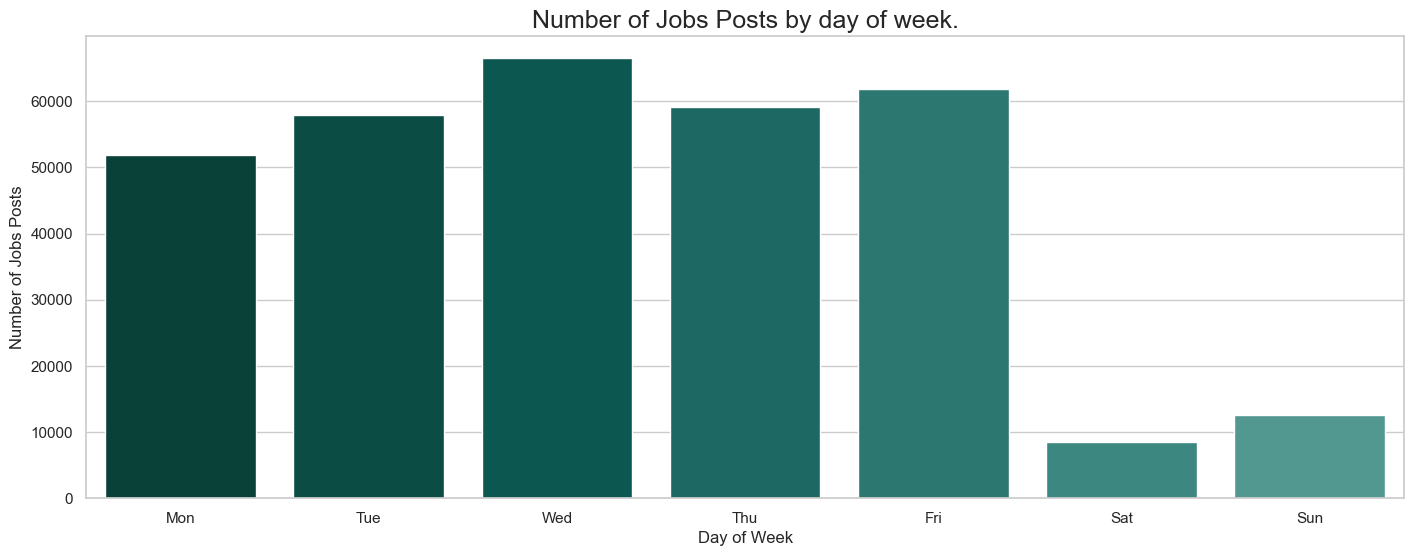

In [72]:
day_cats = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['DayOfWeek']=df['Date'].dt.strftime("%a")
df['DayOfWeekNumber'] = df['Date'].dt.day_of_week
df_jobs_dayofweek = df.groupby(['DayOfWeek']).count().reset_index().sort_values(['DayOfWeek'], 
                                                                                ascending=True) 
df_jobs_dayofweek['CountDayOfWeek']= df_jobs_dayofweek['Id']

df_jobs_dayofweek['DayOfWeek'] = pd.Categorical(df_jobs_dayofweek['DayOfWeek'], categories=day_cats, ordered=True)
df_jobs_dayofweek = df_jobs_dayofweek.sort_values('DayOfWeek')

plt.figure(figsize=(17,6))
plt.title('Number of Jobs Posts by day of week.',size=18)
bar_plt = sns.barplot(x='DayOfWeek', 
                      y='CountDayOfWeek', 
                      palette= sns.color_palette("BrBG_r", 30), 
                      data=df_jobs_dayofweek, dodge=False)

bar_plt.set_xlabel('Day of Week')
bar_plt.set_ylabel('Number of Jobs Posts')

plt.show()


<h3>Observation</h3>
<li>
The bar chart above shows the number of job posting on each day. The majority of number jobs mainly are posted on Wednesday. In contrast, few jobs are posted at the weekend
</li>


### Visualise the number of job posts by day of the month

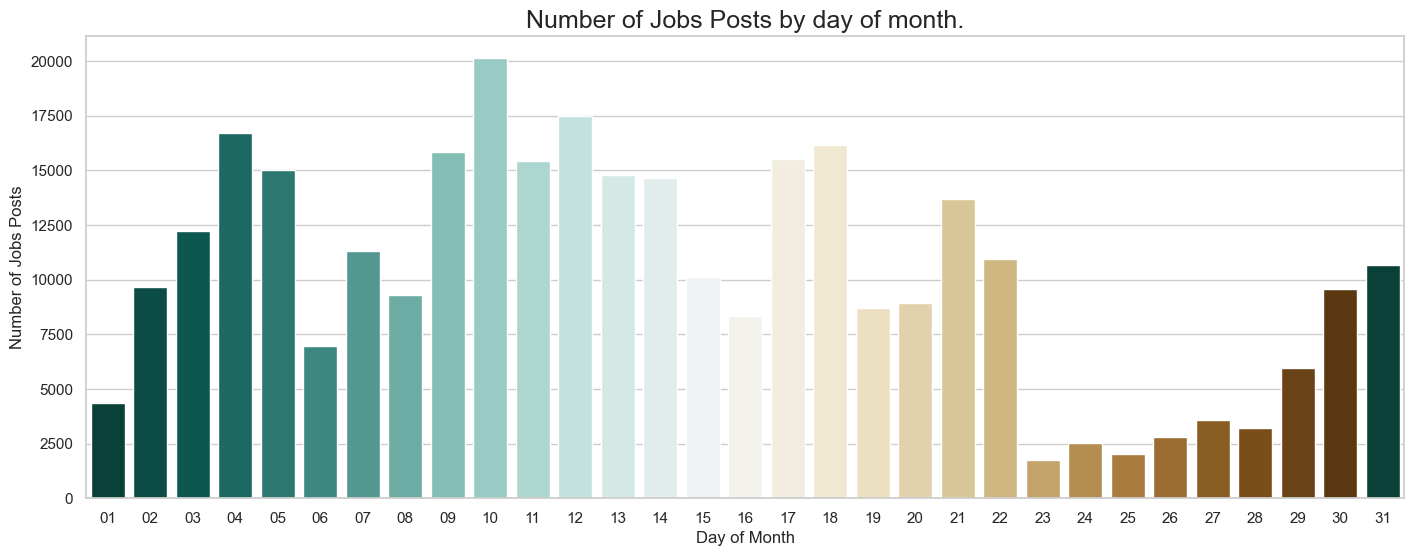

In [73]:
df['DayOfMonth']=df['Date'].dt.strftime("%d")
df_jobs_dayofmonth = df.groupby(['DayOfMonth']).count().reset_index().sort_values(['DayOfMonth'], 
                                                                                  ascending=True) 
df_jobs_dayofmonth['CountDayOfMonth']= df_jobs_dayofmonth['Id']

plt.figure(figsize=(17,6))
plt.title('Number of Jobs Posts by day of month.',size=18)
bar_plt = sns.barplot(x='DayOfMonth', 
                      y='CountDayOfMonth', 
                      palette= sns.color_palette("BrBG_r", 30), 
                      data=df_jobs_dayofmonth, dodge=False)
bar_plt.set_xlabel('Day of Month')
bar_plt.set_ylabel('Number of Jobs Posts')

plt.show()


<h3>Observation</h3>

<li>The bar chart above describes the number of jobs posting on each of month. The number of jobs are mainly posted in the second week of each month, and it is higher than other days. However, the jobs are posted on the days of the final week is lower than other days of month </li>

### Visualise trending of the job postings for the big cities.

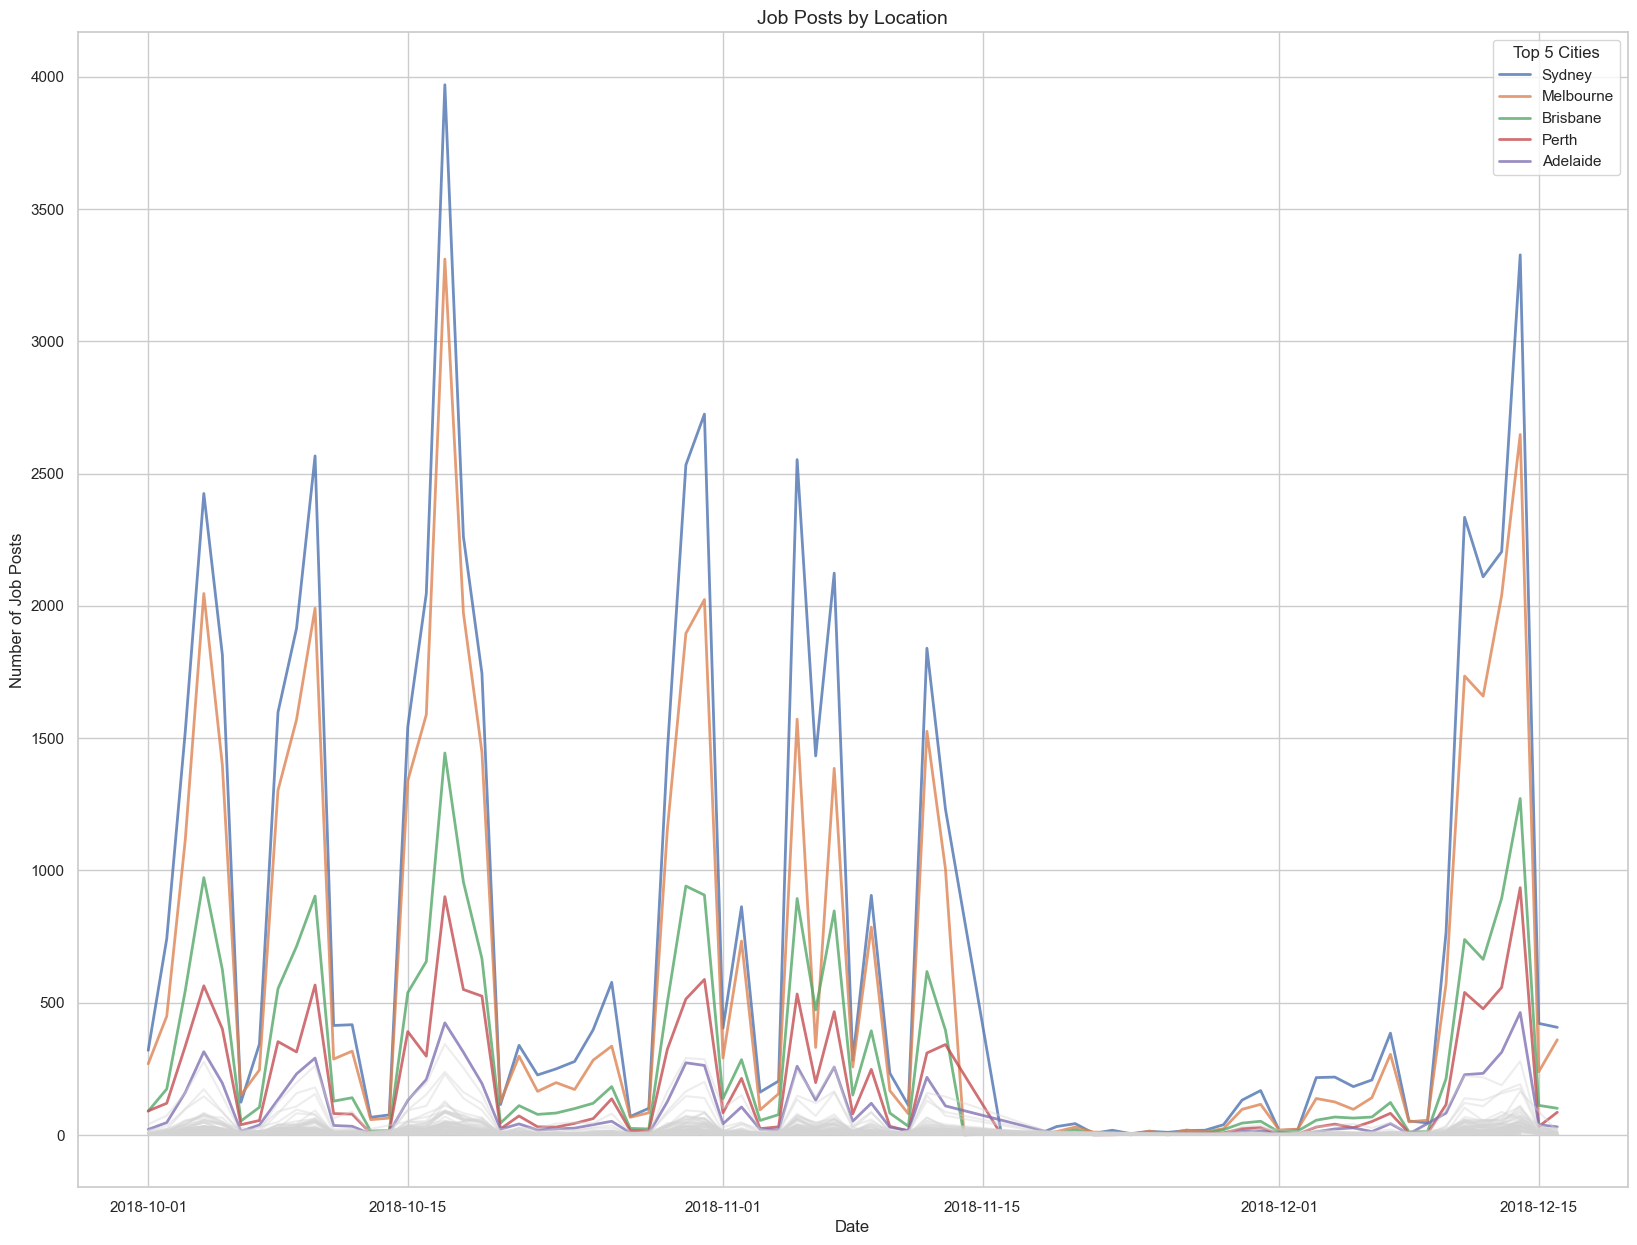

In [74]:
df_location = df[df['Location'].isna()==False]
df_location = df_location[df_location['Location']!= 'FILL VALUE']
plt.figure(figsize=(20,15))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()
df_location_top
# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.show()

### Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion.

<h3>Observation</h3>
The time series chart above shows the number of job posts by location. The time series display sort of data date from the 1st of October 2018 to 15th December 2018. 
<ul>
    <li>There are a lot of irregular fluctuations and there does not seem to be an ovious pattern of posting.</li>
    <li>The highest spikes are in mid October and mid December</li>
    <li>There is a period with a very low amount of job postings from mid November to the start of December.</li>
    <li>Sydney, Melbourne and Brisbane always take high proportion of job posting</li>
</ul>


## 3. Forecasting and skill extractions.

### Using moving average for 7 days and 30 days to predict the number of job postings and visualise them in line chart. Which one creates a better prediction? Explain your choice.**

In [75]:
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)
df_timeseries_total = df_timeseries_total[:151]
df_timeseries_total = df_timeseries_total['Title'].rename('Count')
df_timeseries_total
# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, 
                        '7 Day Moving Average': moving_average_week.mean(), 
                        '30 Day Moving Average': moving_average_month.mean()})

plot_df

,Count,7 Day Moving Average,30 Day Moving Average
Date,,,
2018-10-01,1023,NaN,1023.000000
2018-10-02,1980,NaN,1501.500000
2018-10-03,4945,NaN,2649.333333
2018-10-04,8506,NaN,4113.500000
2018-10-05,5711,4433.000000,4433.000000
...,...,...,...
2019-02-24,53,674.857143,701.666667
2019-02-25,481,127.285714,717.333333
2019-02-26,629,212.285714,738.066667


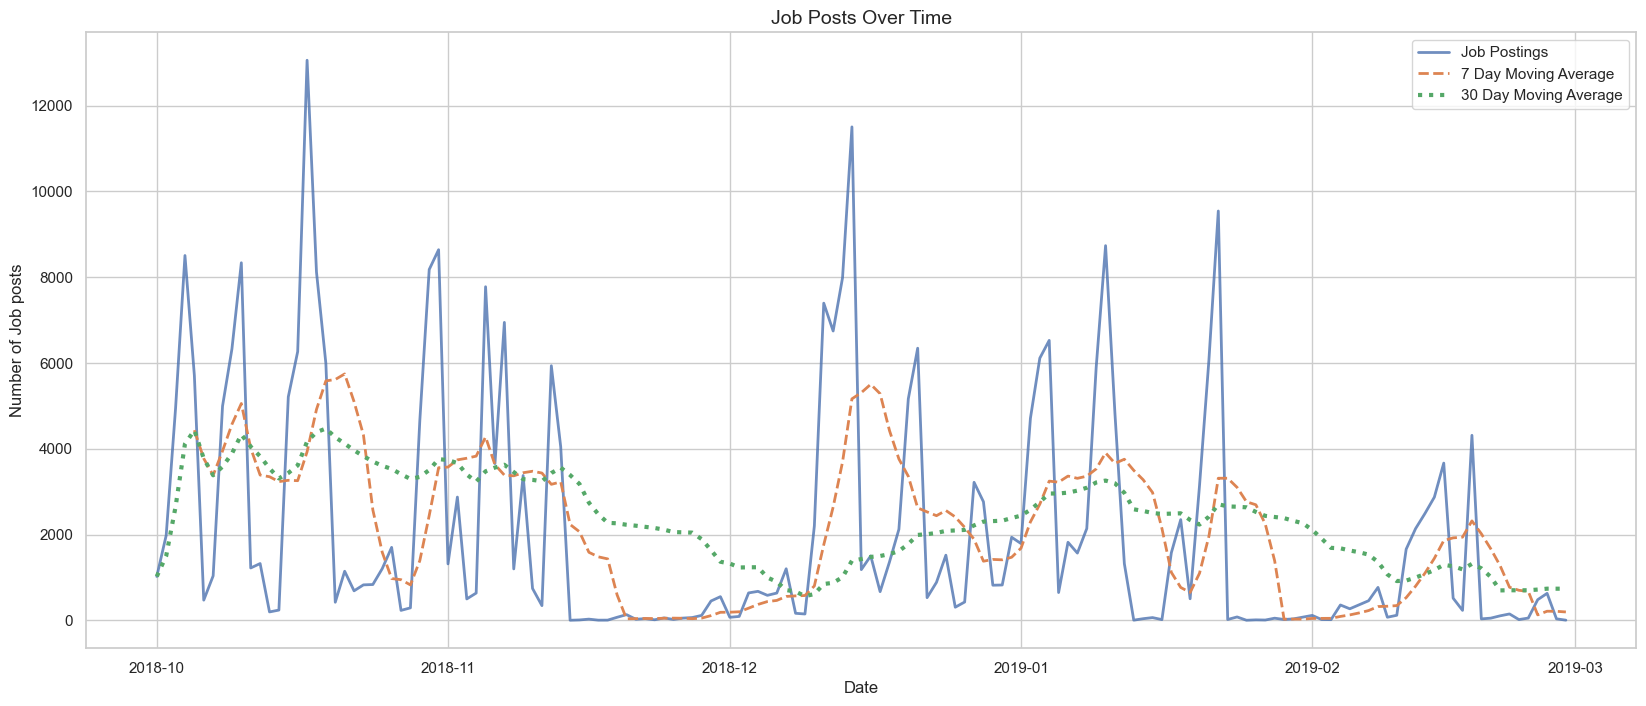

In [76]:
plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

In [77]:
df_tempt = plot_df.reset_index()
df1 = df_tempt[df_tempt['Date'] >='2018-10-05']

df_actual = df1[['Date', 'Count']]
df_ma7 = df1[['Date', '7 Day Moving Average']]
df_ma30 = df1[['Date', '30 Day Moving Average']]

In [78]:
MAD1 = np.absolute(df_actual['Count'] - df_ma7['7 Day Moving Average']).mean()
MAD2 = np.absolute(df_actual['Count'] - df_ma30['30 Day Moving Average']).mean()
print(MAD1)
print(MAD2)

1817.3164885001618
2099.7684489600797


<h3>Observation</h3>

The time series above shows the number of job posts over time, including a moving average by week and month. The dataset ends mid-march and the number of job posts decreases towards the end of the dataset. Future predictions look towards no job posts base on the lines of chart , which is unlikely to actually happen.

<ul>
    <li>There are a lot of irregular fluctuations and there does not seem to be an ovious pattern of posting.</li>
    <li>The highest spikes are in mid October and mid December</li>
    <li>There is a period with a very low amount of job postings from mid November to the start of December.</li>
</ul>

#### We will evaluate the time series using moving average by week and month by MAD formulation . The result of  MAD caculation above describe using moving average by week is better than using moving average by month.

### Choose your favourite job sector/sub-sector, then use TF/IDF to extract important keywords. Visualise them in word cloud chart

In [79]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import wordcloud

classifications = df['Classification'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)


In [80]:
def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=14)
    plt.show()
    
interact(update, Classification=classifications)

interactive(children=(Dropdown(description='Classification', index=13, options=('Retail & Consumer Products', …

<function __main__.update(Classification='Information & Communication Technology')>

<h3>Observation</h3>

<ul>
    <li>Team work and experience are highly valued in all job sectors.</li>
    <li>Much of the job postings textual real estate is dominated by words that directly reference the industry itself.</li>
    <li>Common use of the "time", possibly inflated due to reference to non-skill related terms such as [part time, full time etc.]</li>
    <li>Common use of the "senior", possible contributions from senior positions themselves, and the interaction a non-senior position would require with seniors</li>

</ul>

# Part 4 – Discussion

## Scenario 1
<ul>Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice </ul>

<ul>We will choose five cities in Queensland to get jobs posting data. Then we will get the number of jobs posting of each sector</ul>

In [81]:
dfQ = df[(df['AverageSalary'] >= 80) & (df['Location'].isin(['Brisbane','Sunshine Coast', 
                                                             'Gold Coast',
                                                              'Toowoomba & Darling Downs',
                                                             'Cairns & Far North']))]
dfQ.head(5)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DayOfWeek,DayOfWeekNumber,DayOfMonth
14349,37399675,PHARMACIST - 2 IC,Star Pharmacy Group,2018-10-05,Cairns & Far North,NaN,Healthcare & Medical,Pharmacy,Exclusive opportunity to have permanent roster...,"<h2 class=""subheading"">Smithfield - Star Disco...",80,100,Part Time,90.0,Oct,Fri,4,05
14354,37399661,Clinical Care Coordinator - Toowoomba,Redstone Recruitment Pty Ltd,2018-10-05,Toowoomba & Darling Downs,NaN,Healthcare & Medical,Nursing - Aged Care,Experienced Registered Nurse/Clinical Nurse re...,"<p style=""text-align:center;""><strong>Clinical...",80,100,Full Time,90.0,Oct,Fri,4,05
14369,37399594,Quality Assurance Site Engineer,Now Careers Pty Ltd,2018-10-05,Brisbane,Northern Suburbs,Engineering,Civil/Structural Engineering,QA Engineer for a 6 Month Contract - Civil or ...,Now Careers is working with a Tier 3 Building ...,80,100,Contract/Temp,90.0,Oct,Fri,4,05
14371,37399589,Training Officer,CONCENTIS PTY LTD,2018-10-05,Cairns & Far North,NaN,"Mining, Resources & Energy",Other,Weipa based role for a self starter with excel...,<div>This role is a great opportunity for a se...,80,100,Contract/Temp,90.0,Oct,Fri,4,05
14388,37399502,Civil Foreman Required,Torque Recruitment Group,2018-10-05,Brisbane,Southern Suburbs & Logan,Construction,Foreperson/Supervisors,Experienced Civil Foreman required for ongoing...,"<p style=""text-align:center;""><strong>The Posi...",80,100,Full Time,90.0,Oct,Fri,4,05


In [82]:

dfQ_Sector = dfQ.groupby('Classification').count().reset_index()
dfQ_Sector['Count'] = dfQ_Sector["Id"]
dfQ_Sector = dfQ_Sector[['Classification','Count']]
dfQ_Sector.sort_values("Count", ascending=False, inplace=True)
dfQ_Sector.head(10)


,Classification,Count
17,Information & Communication Technology,2084
14,Healthcare & Medical,1238
11,Engineering,687
7,Construction,628
13,Government & Defence,595
22,"Mining, Resources & Energy",413
10,Education & Training,400
19,Legal,369
0,Accounting,355
25,Sales,342


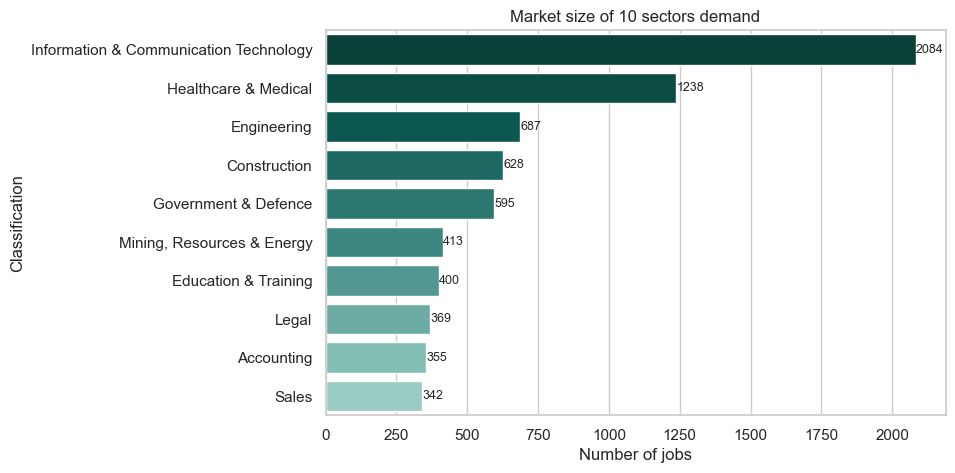

In [83]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=dfQ_Sector.head(10),
           x="Count",
           y="Classification",
           palette= sns.color_palette("BrBG_r", 30))
i = 0
for bars in ax.containers:
    ax.bar_label(ax.containers[i], fontsize=9)
    i = i + 1
    
ax.set(xlabel='Number of jobs', ylabel='Classification')
plt.title("Market size of 10 sectors demand")
plt.show()

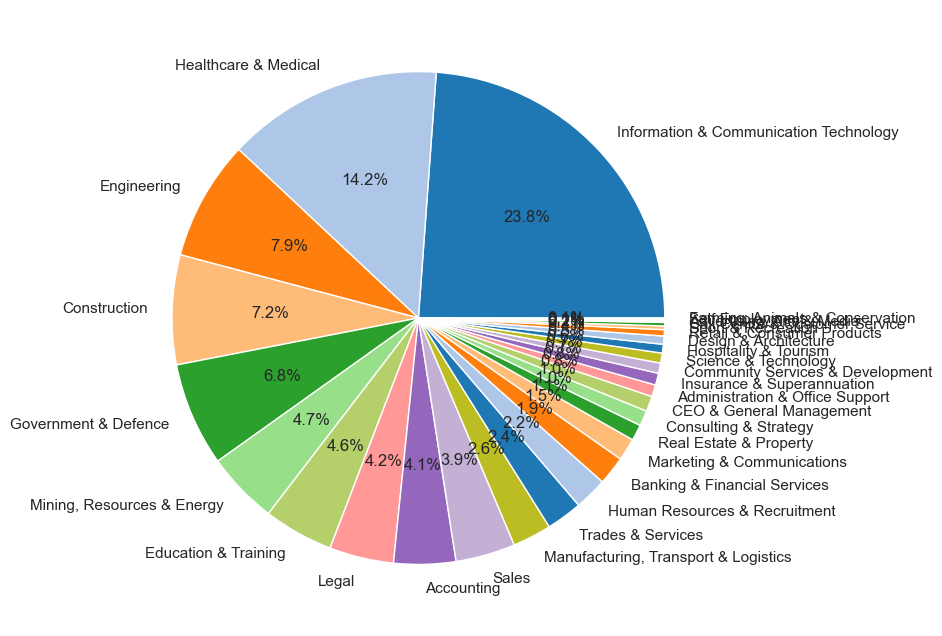

In [84]:
plt.figure(figsize=(8,8))
plt.pie(dfQ_Sector['Count'], 
        labels = dfQ_Sector['Classification'], 
        colors=colors, autopct='%.1f%%')
plt.show()

In [85]:
dfQ_SubSector = dfQ[dfQ['Classification'].isin(['Information & Communication Technology'])]
dfQ_SubSector = dfQ_SubSector[['Classification','SubClassification']]
dfQ_SubSector = dfQ_SubSector.groupby('SubClassification').count().reset_index()
dfQ_SubSector['Count'] = dfQ_SubSector["Classification"]
dfQ_SubSector.sort_values("Count", ascending=False, inplace=True)
dfQ_SubSector.head(10)

,SubClassification,Classification,Count
4,Developers/Programmers,340,340
13,Programme & Project Management,333,333
1,Business/Systems Analysts,309,309
0,Architects,185,185
19,Testing & Quality Assurance,118,118
10,Networks & Systems Administration,111,111
11,Other,103,103
15,Security,92,92
2,Consultants,92,92
9,Management,90,90


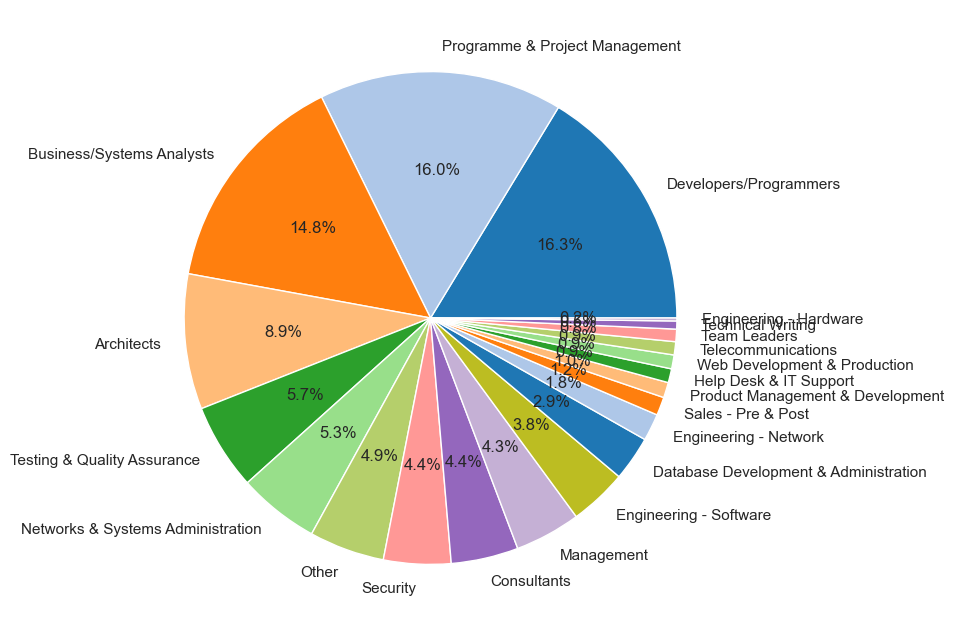

In [86]:
plt.figure(figsize=(8,8))
plt.pie(dfQ_SubSector['Count'], 
        labels = dfQ_SubSector['SubClassification'], 
        colors=colors, autopct='%.1f%%')
plt.show()

### Discussion
In order to recommend a major and some subjects to Tom study at a univeristy we will get all data of jobs postings in all cities in Queensland.  We have five cities in Queensland where Brisbane accounts for a significant proportion of job postings. 

There are many sectors or majors which are posted in market size. The number of job postings in Information And Communication Technology are higher than in other sectors. It accounts for 2084 job postings in the market. It is nearly double the number of postings of Healthcare and Medical and quadruple the number of job postings of Engineering, Construction, and other sectors.

Regarding subjects of ICT, the number of Developers/Programmers, Programme & Project Management, and Business/Systems Analysts accounted for 340, 333, and 309 respectively. They will take nearly 50% of jobs posted in ICT sectors in Queensland.

In conclusion, Tom can choose Information And Communication Technology as his major and study subjects related to Developers/Programmers, Programme & Project Management, and 	Business/Systems Analysts to develop his career path in the future.

## Scenario 2
<ul>To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation </ul>

# Discussion

## Majors to be extended
- According to the boxplot chart "The salary range in the sectors/sub-sectors", Information & Communication Technology (ICT) and Healthcare & Medical are two classifications which should be focused on for extension. The reason is that they accounted for most of the job listings and belong to the top well-paid jobs.
- However, we should investigate more into sub-classifications in each, to find out more accurately which major should be extended.  

['Retail & Consumer Products' 'Call Centre & Customer Service'
 'Hospitality & Tourism' 'Banking & Financial Services'
 'Manufacturing, Transport & Logistics' 'Sales'
 'Administration & Office Support' 'Trades & Services' 'Accounting'
 'Real Estate & Property' 'Healthcare & Medical'
 'Marketing & Communications' 'Government & Defence'
 'Information & Communication Technology' 'Education & Training'
 'Community Services & Development' 'Mining, Resources & Energy'
 'Human Resources & Recruitment' 'Insurance & Superannuation'
 'Engineering' 'CEO & General Management' 'Design & Architecture' 'Legal'
 'Construction' 'Sport & Recreation' 'Science & Technology'
 'Advertising, Arts & Media' 'Farming, Animals & Conservation'
 'Self Employment' 'Consulting & Strategy']


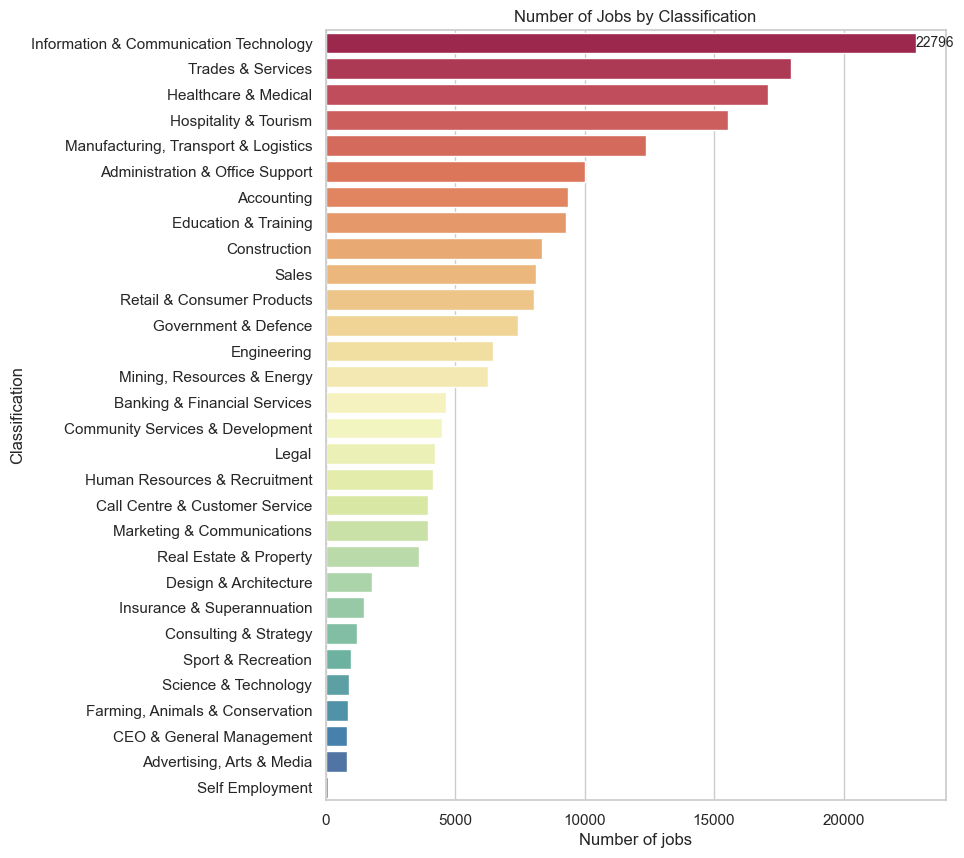

In [87]:
#Bar chart showing The number of postings for each sector

classificationDf = df[df['Classification'].isna()==False]
print(classificationDf['Classification'].unique())
classificationDf = classificationDf.groupby('Classification').count()
classificationDf['Classification'] = classificationDf.index
classificationDf['Count'] = classificationDf["Id"]
classificationDf.sort_values("Count", ascending=False, inplace=True)

plt.figure(figsize = (8,10))
ax=sns.barplot(data = classificationDf, 
            y = 'Classification', 
            x = 'Count', 
            color = "#123456",
            palette = "Spectral")

# i = 0
# for bars in ax.containers:
#     ax.bar_label(ax.containers[i], fontsize=9)
#     i = i + 1
    
ax.set(xlabel='Number of jobs', ylabel='Classification')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title("Number of Jobs by Classification")
plt.show()

In [88]:
# Analyze SubClassifications of ICT

ICTSubclassification = df[df["Classification"] == "Information & Communication Technology"]
orderICTSubclassification = ICTSubclassification["SubClassification"].value_counts().index
orderICTSubclassification

Index(['Developers/Programmers', 'Business/Systems Analysts',
       'Programme & Project Management', 'Architects',
       'Engineering - Software', 'Help Desk & IT Support',
       'Networks & Systems Administration', 'Consultants', 'Other',
       'Testing & Quality Assurance', 'Security', 'Management',
       'Engineering - Network', 'Database Development & Administration',
       'Web Development & Production', 'Sales - Pre & Post',
       'Product Management & Development', 'Telecommunications',
       'Team Leaders', 'Engineering - Hardware', 'Technical Writing',
       'Computer Operators'],
      dtype='object', name='SubClassification')

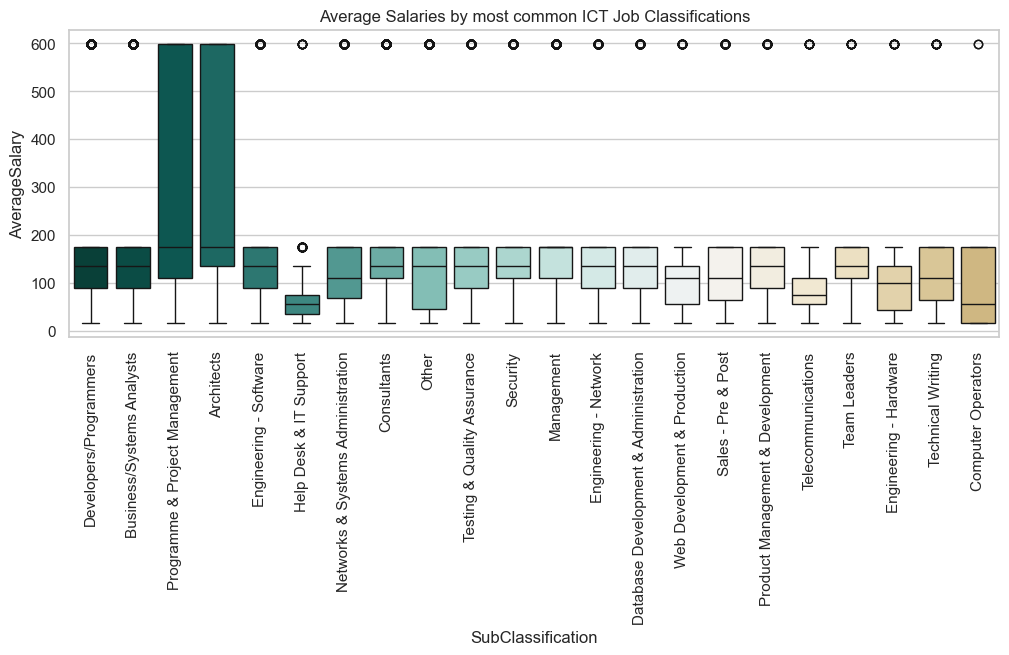

In [89]:
# Average Salaries of ICT Subclassifications

plt.figure(figsize = (12,4))
sns.boxplot(data=ICTSubclassification,
            x="SubClassification",
            y="AverageSalary",
            order=orderICTSubclassification,
            palette=sns.color_palette("BrBG_r", n_colors=30))
plt.title("Average Salaries by most common ICT Job Classifications")
plt.xticks(rotation=90)
plt.show()

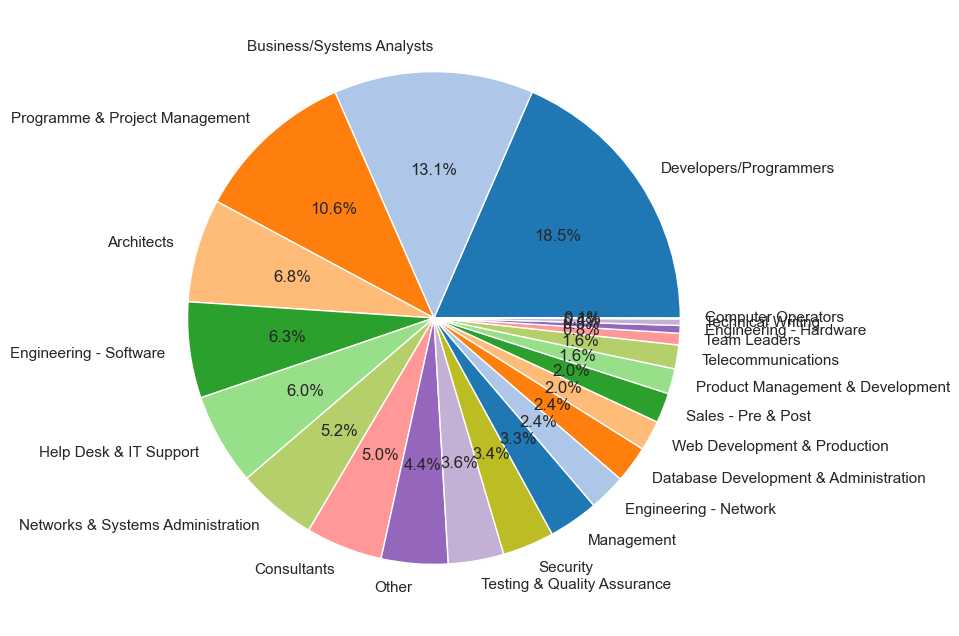

In [90]:
# Pie chart for job market share of IT Job Subclassifications
from matplotlib import cm

dfIT = ICTSubclassification
df_pieIT = dfIT['SubClassification'].groupby(dfIT['SubClassification'])

df_pieIT = df_pieIT.count().sort_values(ascending=False).to_frame()
df_pieIT['Value'] = df_pieIT['SubClassification']
df_pieIT['SubClassification'] = df_pieIT.index

plt.figure(figsize=(8,8))
plt.pie(df_pieIT['Value'], labels = df_pieIT['SubClassification'], colors=colors, autopct='%.1f%%')
plt.show()

- According to the above boxplot chart, Programme & Project Management and Architects have the highest average salary (as AUD600,000 per year). 
- Developers/Programmers subclassification accounted for the largest portion of the pie chart (18.5%), followed by Business/Systems Analysis and Programme & Project Management (13.1% and 10.6% respectively). 
- In the range from 5% to 7%, there are some subclassifications such as Consultants, Help Desk & IT support, Networks & Systems Administration and Engineering - Software. 

=> In conclusion, according to the analyzed data as above and information of IT program and courses from Griffith website, to attract more students by enhancing the employability of the graduates, we would recommend to extend these 2 majors as Software Development and Support, Information systems and Enterprise Architecture and Data Analytics. Data Analytics major could be mentioned as "Business Analyst" job in the data. 

=> In general, highest salary for most of the subclassifications are quite equal (around AUD200,000 per year). The only difference is the number of job postings. For that reason, other major such as Networking & Cyber Security can be kept and observed before taking any further decision in whether extending or reducing the near future. 

In [91]:
# Analyze SubClassifications of Healthcare sector

HealthSubclassification = df[df["Classification"] == "Healthcare & Medical"]
orderHealthSubclassification = HealthSubclassification["SubClassification"].value_counts().index
orderHealthSubclassification

Index(['Nursing - Aged Care', 'Physiotherapy, OT & Rehabilitation',
       'General Practitioners', 'Psychology, Counselling & Social Work',
       'Nursing - General Medical & Surgical', 'Dental', 'Other',
       'Medical Administration', 'Pharmacy', 'Medical Specialists',
       'Pharmaceuticals & Medical Devices', 'Management', 'Medical Imaging',
       'Nursing - A&E, Critical Care & ICU',
       'Nursing - Psych, Forensic & Correctional Health',
       'Nursing - Management', 'Sales',
       'Nursing - Community, Maternal & Child Health',
       'Nursing - Theatre & Recovery', 'Residents & Registrars',
       'Nursing - Midwifery, Neo-Natal, SCN & NICU',
       'Clinical/Medical Research', 'Speech Therapy', 'Pathology',
       'Nursing - Educators & Facilitators', 'Optical',
       'Natural Therapies & Alternative Medicine', 'Environmental Services',
       'Nursing - Paediatric & PICU', 'Nursing - High Acuity',
       'Ambulance/Paramedics', 'Dieticians', 'Chiropractic & Osteopat

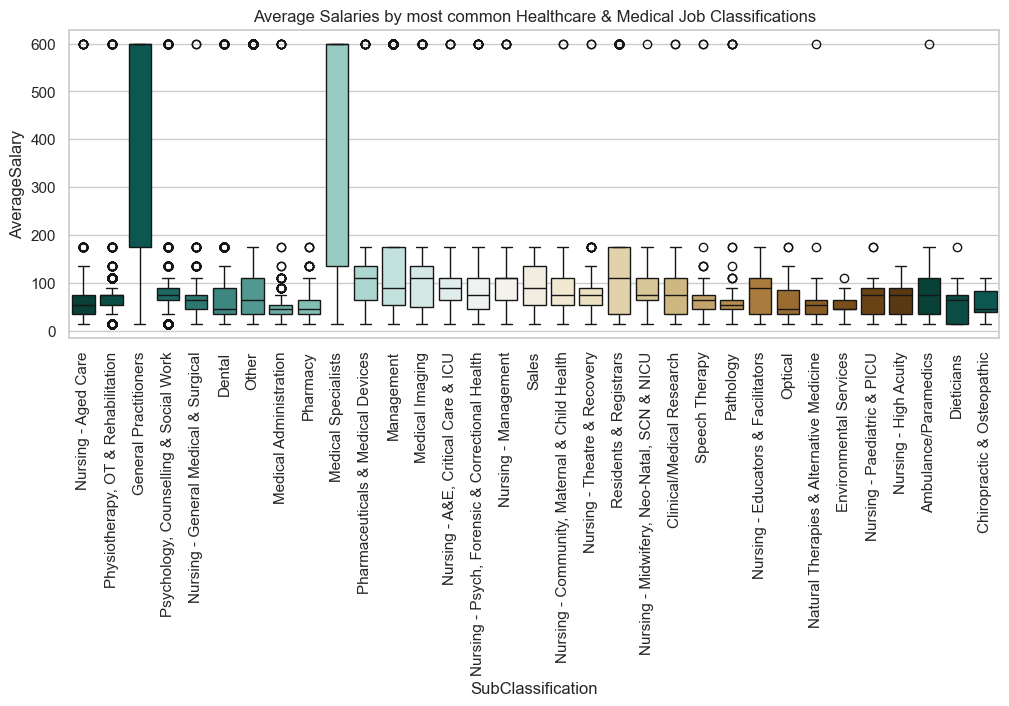

In [92]:
# Average Salaries of Healthcare & Medical Job Subclassifications

plt.figure(figsize = (12,4))
sns.boxplot(data=df,
            x="SubClassification",
            y="AverageSalary",
            order=orderHealthSubclassification,
            palette=sns.color_palette("BrBG_r", n_colors=30))
plt.title("Average Salaries by most common Healthcare & Medical Job Classifications")
plt.xticks(rotation=90)
plt.show()

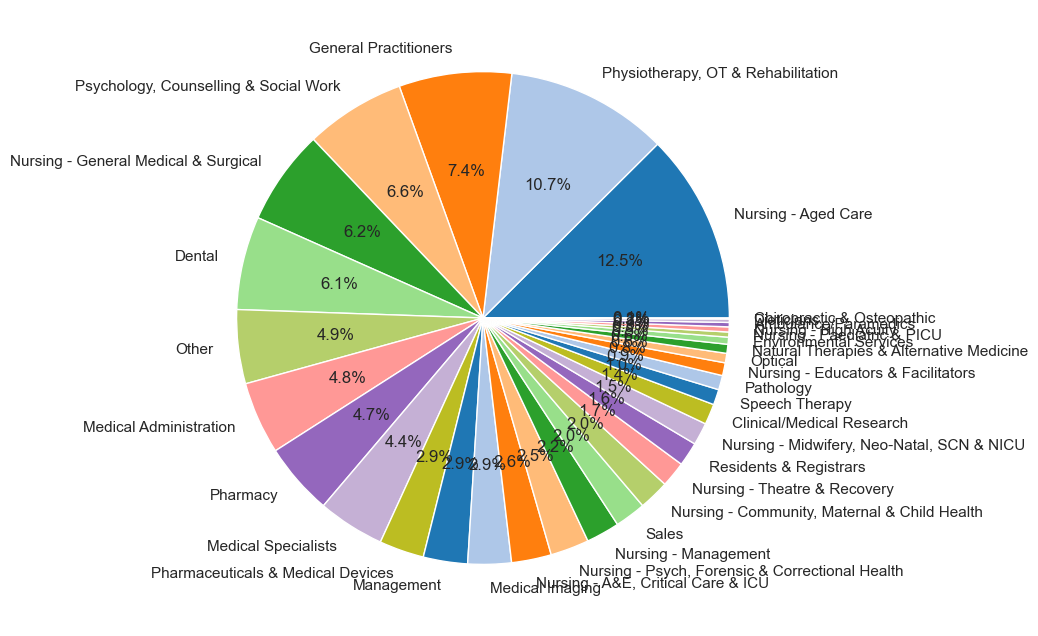

In [93]:
# Pie chart for job market share of Healthcare & Medical subclassifications
from matplotlib import cm

dfHealth = HealthSubclassification
df_pieHealth = dfHealth['SubClassification'].groupby(dfHealth['SubClassification'])

df_pieHealth = df_pieHealth.count().sort_values(ascending=False).to_frame()
df_pieHealth['Value'] = df_pieHealth['SubClassification']
df_pieHealth['SubClassification'] = df_pieHealth.index

plt.figure(figsize=(8,8))
plt.pie(df_pieHealth['Value'], labels = df_pieHealth['SubClassification'], colors=colors, autopct='%.1f%%')
plt.show()

- According to the above boxplot chart, 'General Practitioners' and 'Medical Specialist's have the highest average salary (as AUD600,000 per year).
- 'Nursing - Aged Care' accounted for the largest portion of the pie chart (12.5%), followed by 'Physiotherapy, OT & Rehabilitation' and 'General Practitioners'(which are 10.7% and 7.4% respectively).
- In the range from 6% to 7%, there are some subclassifications such as 'Psychology, Counselling & Social Work', 'Nursing - General Medical & Surgical' and 'Dental'.

=> In conclusion, according to the analyzed data as above and information of Health program and courses from Griffith website, to attract more students by enhancing the employability of the graduates, we would recommend to extend these majors, including Medical Science; Nursing; Dental Health Science/Clinical Dentistry; Physiotherapy; Psychology and Social work.

=> Other majors can be reduced since they are not either accounted for most of the job postings number or in the low ranks of Average salary, such as Forensic Mental Health, Health services management, Speech Pathology, etc.

## Majors to be reduced
- According to the above bar chart showing The number of postings for each sector, there are 5 classifications we should focus on to evaluate whether we should reduce or not, due to low number of job postings.
- They include 'Sport & Recreation','Science & Technology','Advertising, Arts & Media', 'Farming, Animals & Conservation', 'Self Employment', 'Consulting & Strategy','CEO & General Management.
- For better decision, Average Salary should be taken into consideration when analyzing. 

In [94]:
df_reduce = df[df["Classification"].isin (['Sport & Recreation','Science & Technology'
 ,'Advertising, Arts & Media', 'Farming, Animals & Conservation',
 'Self Employment', 'Consulting & Strategy','CEO & General Management'])]
df_reduce.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,AverageSalary,Month,DayOfWeek,DayOfWeekNumber,DayOfMonth
131,37404228,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leadersh...,<p><strong>About us&nbsp;</strong></p>\n ...,0,30,Full Time,15.0,Oct,Sun,6,07
132,37404226,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07,Melbourne,CBD & Inner Suburbs,CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leader...,<p><strong>About us&nbsp;</strong></p>\n ...,0,30,Full Time,15.0,Oct,Sun,6,07
188,37404218,Executive Manager - Women and Girls,Football Federation Victoria,2018-10-07,Melbourne,CBD & Inner Suburbs,Sport & Recreation,Management,Incredible opportunity for an Executive Manage...,<p>We are seeking applications for an incredib...,0,30,Full Time,15.0,Oct,Sun,6,07
210,37404155,Fitness enthusiasts / PTs - PUMP your resume a...,My Joblist,2018-10-07,Brisbane,CBD & Inner Suburbs,Sport & Recreation,Fitness & Personal Training,Use your coaching and sales skills to promote ...,<p><em>Looking for&nbsp;something different wi...,0,30,Contract/Temp,15.0,Oct,Sun,6,07
269,37404080,Technical Writer - Science / Chemistry,ESE Recruitment,2018-10-07,Melbourne,Eastern Suburbs,Science & Technology,Chemistry & Physics,"Experienced Technical Writer, available for an...",<p><strong>The Company</strong><br>A wonderful...,0,30,Contract/Temp,15.0,Oct,Sun,6,07


In [95]:
X = ['Sport & Recreation',
     'Science & Technology',
     'Advertising, Arts & Media', 
     'Farming, Animals & Conservation',
     'Consulting & Strategy',
     'CEO & General Management']
def get_salary_range(cls):
    df_reduce = df[df["Classification"] ==cls]

    low = df_reduce['LowestSalary'].dropna().unique()
    high = df_reduce['HighestSalary'].dropna().unique()
    assert(len(low)==len(high))

    df_salary_ranges = pd.DataFrame({"Low": low, "High":high})
    df_salary_ranges['Count'] = df_salary_ranges['Low'].apply(lambda x: len(df_reduce[df_reduce['LowestSalary']==x]))
    df_salary_ranges['Label'] = pd.Series(['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100', '100-120', 
                                        '120-150', '150-200', '200-999'])

    df_salary_ranges['Classification'] = cls
    return df_salary_ranges

df_result = pd.DataFrame()
for item in X:
    df_tempt = get_salary_range(item)
    df_result= pd.concat([df_result,df_tempt])
df_result    
    

,Low,High,Count,Label,Classification
0,0,30,243,0-30,Sport & Recreation
1,30,40,96,30-40,Sport & Recreation
2,40,50,212,40-50,Sport & Recreation
3,50,60,118,50-60,Sport & Recreation
4,60,70,116,60-70,Sport & Recreation
...,...,...,...,...,...
6,150,200,239,80-100,CEO & General Management
7,200,999,246,100-120,CEO & General Management
8,40,50,6,120-150,CEO & General Management
9,60,70,13,150-200,CEO & General Management


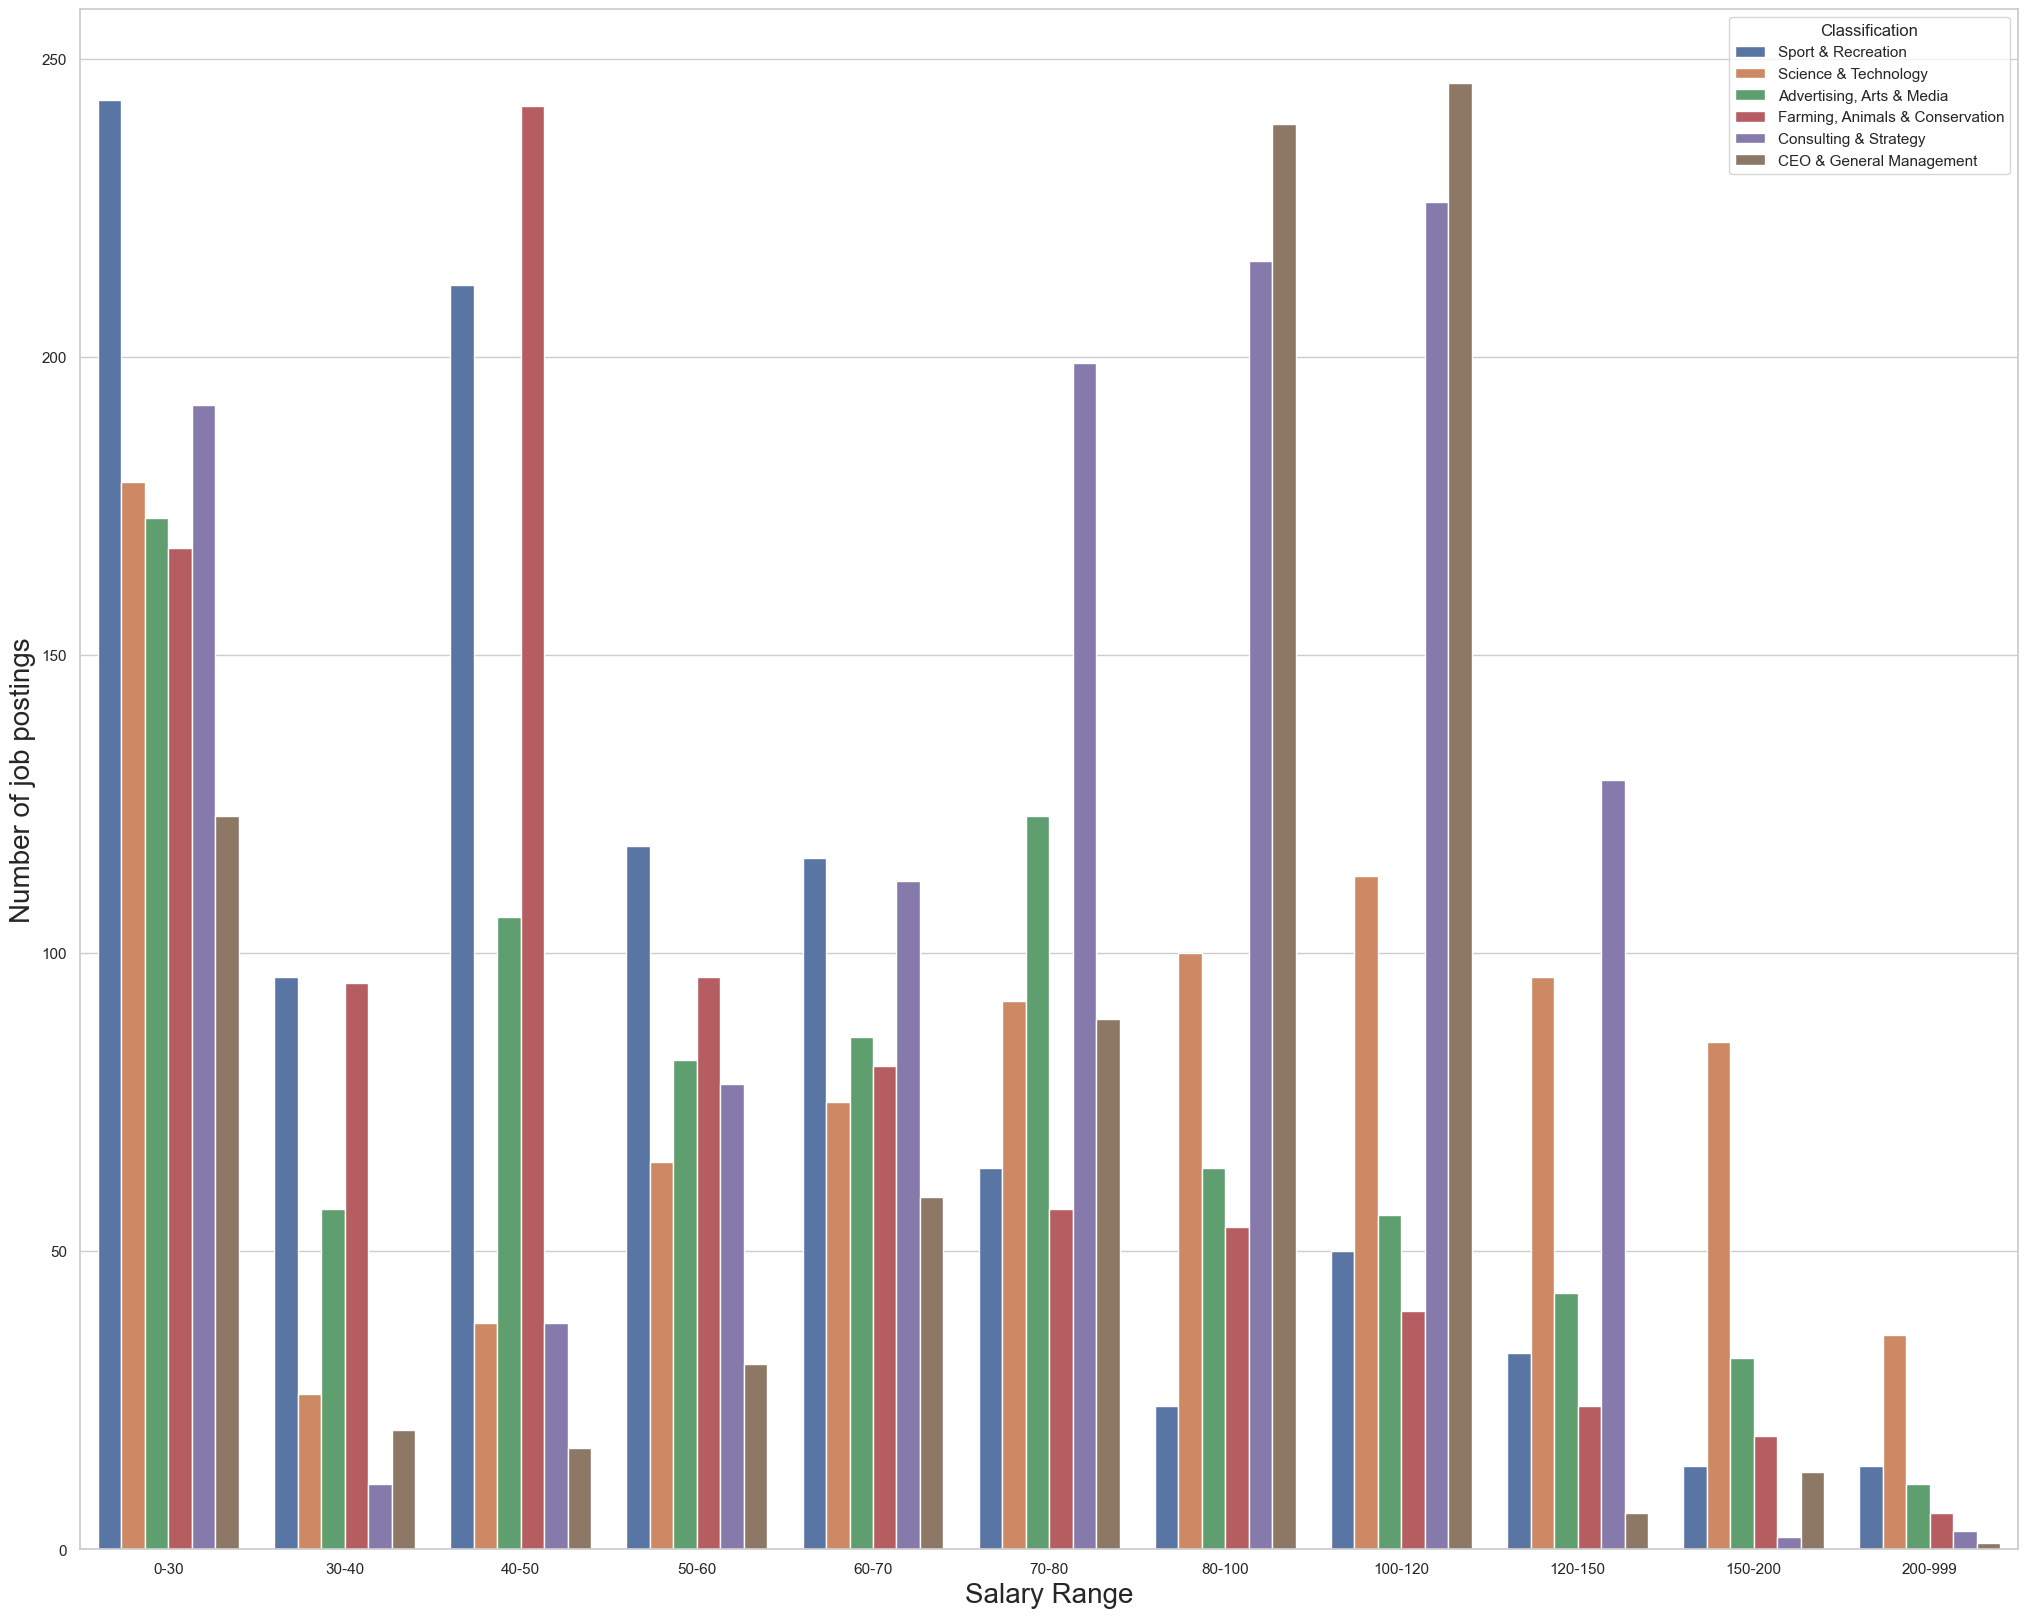

In [96]:
plt.figure(figsize=(25, 20))
sns.barplot(x='Label', y='Count', hue='Classification', data=df_result)
plt.xlabel('Salary Range',fontsize=20)
plt.ylabel('Number of job postings',fontsize=20)
plt.show()

- According to the above bar chart, in compairing salary and number of job postings among these classifications, those majors related to classifications'Sport & Recreation' and 'Advertising, Arts & Media' should be reduced, due to low number of job postings in medium and high average salary (e.g. for 'Sport & Recreation', only 25 jobs are posted with salary range (AUD80K- 100K), meanwhile, for 'Consulting & Strategy', around 225 jobs are posted with the same salary range)
- Therefore, some majors to be reduced are Degrees in Visual arts, Media production, Sport management, etc.